In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import math 
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import random 
from yahoo_fin import stock_info as si
from sklearn.linear_model import LinearRegression

In [2]:
ticker = "SUNTECK.NS"
df = si.get_data(ticker)


In [3]:
df.head()

,open,high,low,close,adjclose,volume,ticker
2009-11-13,261.450012,267.399994,256.350006,258.174988,247.728439,308080.0,SUNTECK.NS
2009-11-16,258.500000,270.475006,258.500000,264.924988,254.205292,391138.0,SUNTECK.NS
2009-11-17,269.750000,274.475006,260.000000,260.600006,250.055313,341594.0,SUNTECK.NS
2009-11-18,271.350006,274.250000,258.500000,262.200012,251.590637,315010.0,SUNTECK.NS
2009-11-19,265.000000,269.500000,257.625000,259.774994,249.263748,264678.0,SUNTECK.NS


In [4]:
# Retrieve the 'open' column from the DataFrame and assign it to the variable 'open_prices'
# DataFrame'den 'open' sütununu alıp 'open_prices' değişkenine atama yap
open_prices = df['open']

# Retrieve the 'close' column from the DataFrame and assign it to the variable 'close_prices'
# DataFrame'den 'close' sütununu alıp 'close_prices' değişkenine atama yap
close_prices = df['close']

# Retrieve the 'volume' column from the DataFrame and assign it to the variable 'volumes'
# DataFrame'den 'volume' sütununu alıp 'volumes' değişkenine atama yap
volumes = df['volume']

# Retrieve the 'high' column from the DataFrame and assign it to the variable 'high_prices'
# DataFrame'den 'high' sütununu alıp 'high_prices' değişkenine atama yap
high_prices = df['high']

# Retrieve the 'low' column from the DataFrame and assign it to the variable 'low_prices'
# DataFrame'den 'low' sütununu alıp 'low_prices' değişkenine atama yap
low_prices = df['low']

# Set the value of DATA_LEN to 300
# DATA_LEN değerini 300 olarak ayarla
DATA_LEN = 300

# Trim the 'close_prices' list to the last 300 elements
# 'close_prices' listesini son 300 öğeyle sınırla
close_prices = close_prices[len(
    close_prices) - DATA_LEN:len(close_prices)].to_list()

# Trim the 'open_prices' list to the last 300 elements
# 'open_prices' listesini son 300 öğeyle sınırla
open_prices = open_prices[len(open_prices) -
                          DATA_LEN:len(open_prices)].to_list()

# Trim the 'volumes' list to the last 300 elements
# 'volumes' listesini son 300 öğeyle sınırla
volumes = volumes[len(volumes) - DATA_LEN:len(volumes)].to_list()

# Trim the 'high_prices' list to the last 300 elements
# 'high_prices' listesini son 300 öğeyle sınırla
high_prices = high_prices[len(high_prices) -
                          DATA_LEN:len(high_prices)].to_list()

# Trim the 'low_prices' list to the last 300 elements
# 'low_prices' listesini son 300 öğeyle sınırla
low_prices = low_prices[len(low_prices) - DATA_LEN:len(low_prices)].to_list()


In [5]:
plt.style.use('dark_background')

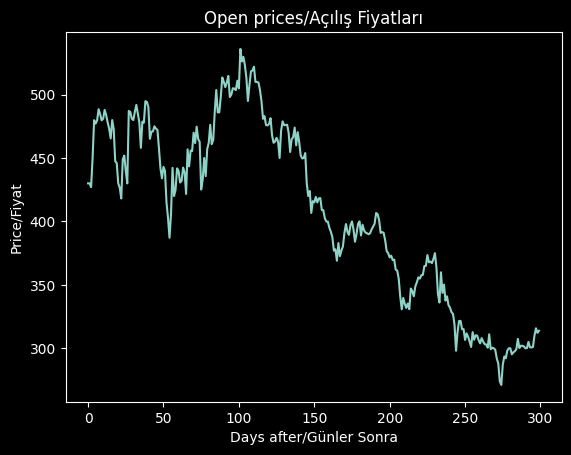

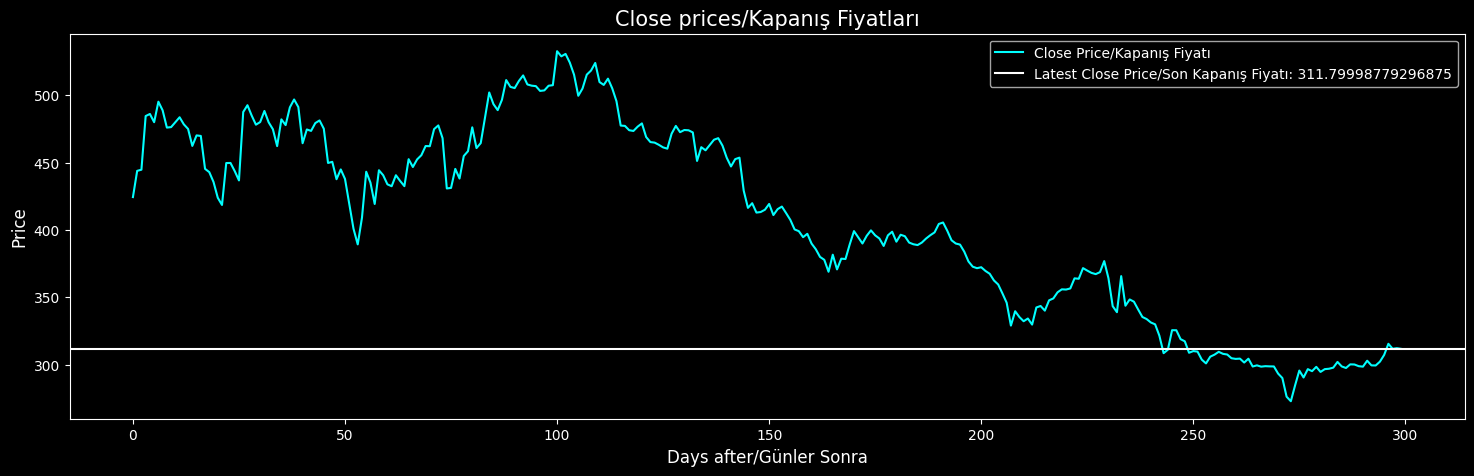

In [6]:
import os

# Klasörü oluştur
os.makedirs("graphed-results", exist_ok=True)

plt.title("Open prices/Açılış Fiyatları")
plt.xlabel("Days after/Günler Sonra")
plt.ylabel("Price/Fiyat")
plt.plot(open_prices)
plt.show()

plt.figure(figsize=(18, 5))
plt.title("Close prices/Kapanış Fiyatları", fontsize=15)
plt.xlabel("Days after/Günler Sonra", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.plot(close_prices, 'cyan', label='Close Price/Kapanış Fiyatı')
plt.axhline(y=close_prices[len(close_prices) - 1], label=f'Latest Close Price/Son Kapanış Fiyatı: {close_prices[len(close_prices) - 1]}')
plt.legend()

# Grafiği kaydet
plt.savefig("graphed-results/close-price.png")
plt.show()


In [7]:
len(close_prices)

300

In [8]:
# Retrieve the 'close' column from the DataFrame and assign it to the variable 'close_for_calc'
# DataFrame'den 'close' sütununu alıp 'close_for_calc' değişkenine atama yap
close_for_calc = df['close']

# Trim the 'close_for_calc' list to the last 300 elements
# 'close_for_calc' listesini son 300 öğeyle sınırla
close_for_calc = close_for_calc[len(
    close_for_calc) - DATA_LEN:len(close_for_calc)]


## Applying indicators to predict the general trend of the stock / Hisse senedinin genel eğilimini tahmin etmek için göstergeler uygulama

## First Metric :- Relative Strength Index / Bağıl Güç Endeksi (RSI) 

Resource / Kaynak :- https://www.wallstreetmojo.com/relative-strength-index/

In [9]:
import pandas_ta as pta
relative_strength_indexs = pta.rsi(close_for_calc, length = 14)
relative_strength_indexs = relative_strength_indexs.to_list()

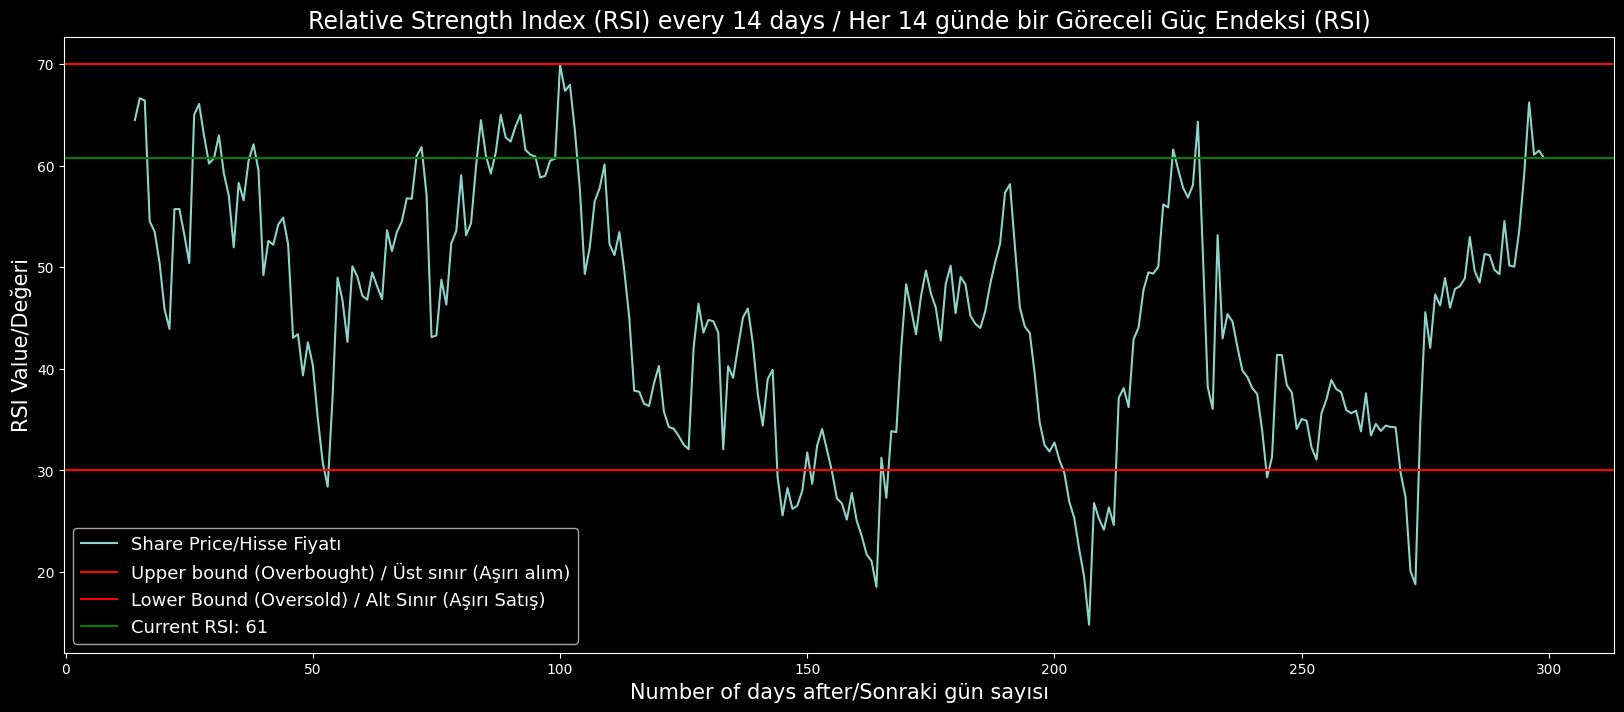

In [10]:
import os
import matplotlib.pyplot as plt

# Klasörü oluştur
os.makedirs("graphed-results", exist_ok=True)

plt.figure(figsize=(20, 8))
plt.plot(relative_strength_indexs, label='Share Price/Hisse Fiyatı')
plt.axhline(y=70, color='r', label='Upper bound (Overbought) / Üst sınır (Aşırı alım)')
plt.axhline(y=30, color='r', label='Lower Bound (Oversold) / Alt Sınır (Aşırı Satış)')
plt.axhline(y=relative_strength_indexs[-1], color='g', label=f'Current RSI: {round(relative_strength_indexs[-1])}')
plt.title("Relative Strength Index (RSI) every 14 days / Her 14 günde bir Göreceli Güç Endeksi (RSI)", fontsize=17)
plt.xlabel("Number of days after/Sonraki gün sayısı", fontsize=15)
plt.ylabel("RSI Value/Değeri", fontsize=15)
plt.legend(prop={'size': 13})

# Grafiği kaydet
plt.savefig("graphed-results/RSI.png")
plt.show()


## Creating Bollinger Bands / Bollinger Bantları Oluşturma

Simple Moving Average Equation + std 2

Basit Hareketli Ortalama Denklem + std 2

In [11]:
import statistics

# Calculate the rolling average of 'close_for_calc' with a window size of 5
# 'close_for_calc' listesinin 5 elemanlık bir pencereyle hareketli ortalamasını hesapla
close_avg = close_for_calc.rolling(5).mean().to_list()

# Calculate the rolling standard deviation of 'close_for_calc' with a window size of 5
# 'close_for_calc' listesinin 5 elemanlık bir pencereyle hareketli standart sapmasını hesapla
standard_deviations = close_for_calc.rolling(5).std().to_list()

upper_bollinger_band = []
lower_bollinger_band = []

# Iterate over the elements in 'standard_deviations' list
# 'standard_deviations' listesindeki öğeleri üzerinde dolaş
for i in range(len(standard_deviations)):
    
    # Calculate the upper bound of the Bollinger Bands using the formula: close_avg + (standard_deviation * 2)
    # Bollinger Bantlarının üst sınırını hesapla: close_avg + (standard_deviation * 2)
    upper_bound = close_avg[i] + (standard_deviations[i] * 2)
    
    # Calculate the lower bound of the Bollinger Bands using the formula: close_avg - (standard_deviation * 2)
    # Bollinger Bantlarının alt sınırını hesapla: close_avg - (standard_deviation * 2)
    lower_bound = close_avg[i] - (standard_deviations[i] * 2)
    
    # Append the upper bound to the 'upper_bollinger_band' list
    # Üst sınırları 'upper_bollinger_band' listesine ekle
    upper_bollinger_band.append(upper_bound)
    
    # Append the lower bound to the 'lower_bollinger_band' list
    # Alt sınırları 'lower_bollinger_band' listesine ekle
    lower_bollinger_band.append(lower_bound)

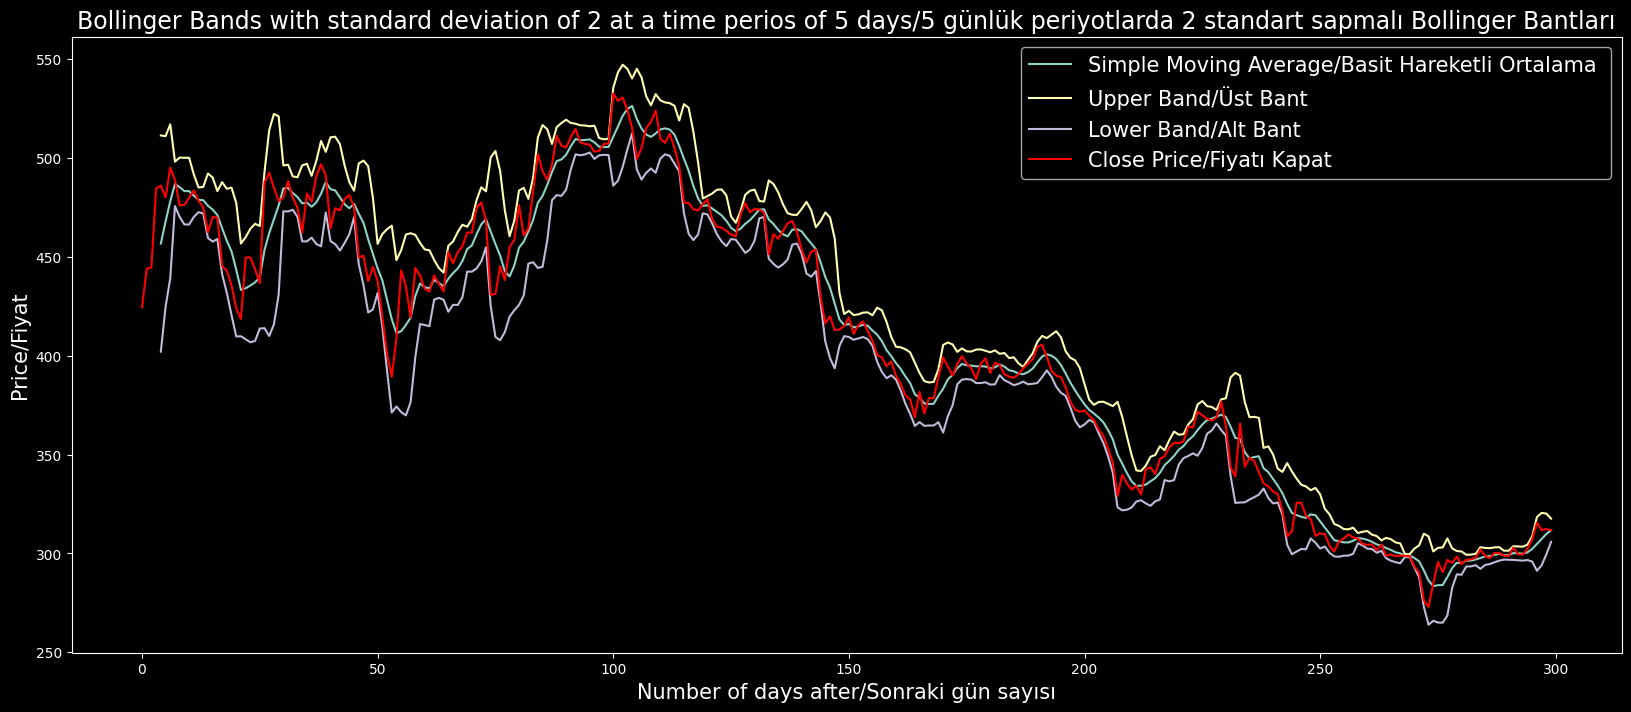

In [12]:
import matplotlib.pyplot as plt 


# Uncomment for interactive graphs
# İnteraktif grafikler için yorumu kaldırın
# %matplotlib notebook

plt.figure(figsize=(20, 8))
plt.plot(close_avg, label='Simple Moving Average/Basit Hareketli Ortalama ')
plt.plot(upper_bollinger_band, label='Upper Band/Üst Bant')
plt.plot(lower_bollinger_band, label='Lower Band/Alt Bant')
plt.plot(close_prices, 'r', label='Close Price/Fiyatı Kapat')
plt.title("Bollinger Bands with standard deviation of 2 at a time perios of 5 days/5 günlük periyotlarda 2 standart sapmalı Bollinger Bantları", fontsize=17)
plt.xlabel("Number of days after/Sonraki gün sayısı", fontsize=15)
plt.ylabel("Price/Fiyat", fontsize=15)
plt.legend(prop = {'size' : 15})
plt.savefig("graphed-results/SMA + Bollinger Bands")
plt.show()

## OBV :- On Balance Volume / Bakiye Hacmi

In [13]:
on_balance_volumes = []
obv = 0

# Append the initial value of OBV (0) to the 'on_balance_volumes' list
# Başlangıç değeri olarak OBV'nin (0) 'on_balance_volumes' listesine eklenmesi
on_balance_volumes.append(obv)

# Iterate over the elements in the 'volumes' list starting from index 1
# İndex 1'den başlayarak 'volumes' listesindeki öğelerin üzerinde dolaşma
for i in range(1, len(volumes)):
    if close_prices[i] > close_prices[i - 1]:
        # If the current closing price is higher than the previous closing price,
        # increase the OBV by adding the current volume to it
        # Eğer mevcut kapanış fiyatı önceki kapanış fiyatından yüksekse,
        # OBV'yi mevcut hacimle artır
        obv += volumes[i]
        on_balance_volumes.append(obv)

    elif close_prices[i] < close_prices[i - 1]:
        # If the current closing price is lower than the previous closing price,
        # decrease the OBV by subtracting the current volume from it
        # Eğer mevcut kapanış fiyatı önceki kapanış fiyatından düşükse,
        # OBV'yi mevcut hacimden çıkar
        obv -= volumes[i]
        on_balance_volumes.append(obv)

    else:
        # If the current closing price is equal to the previous closing price,
        # the OBV remains unchanged (add 0 to OBV)
        # Eğer mevcut kapanış fiyatı önceki kapanış fiyatına eşitse,
        # OBV değişmez (OBV'ye 0 ekle)
        obv += 0
        on_balance_volumes.append(obv)

In [14]:
NUM_OF_DAYS_2 = 5

# Create a DataFrame 'obv_df' using the 'on_balance_volumes' list
# 'on_balance_volumes' listesini kullanarak 'obv_df' adında bir DataFrame oluştur
obv_df = pd.DataFrame(on_balance_volumes)

# Calculate the simple moving average (SMA) of 'obv_df' with a window size of NUM_OF_DAYS_2
# 'obv_df' DataFrame'inin NUM_OF_DAYS_2 boyutunda basit hareketli ortalamasını hesapla
obv_sma = obv_df.rolling(NUM_OF_DAYS_2).mean()


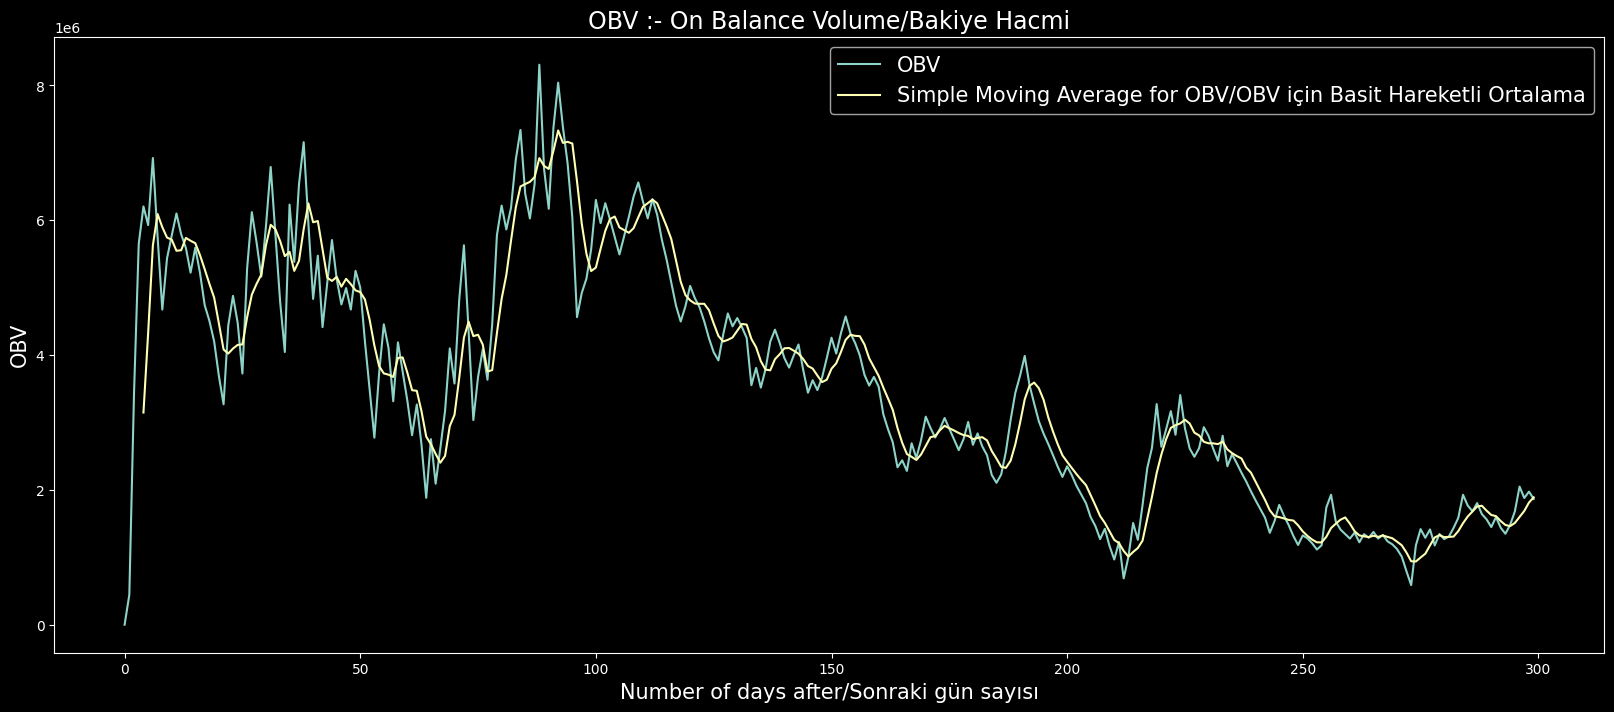

In [15]:
plt.figure(figsize=(20, 8))
plt.plot(on_balance_volumes, label='OBV')
plt.plot(obv_sma, label='Simple Moving Average for OBV/OBV için Basit Hareketli Ortalama')
plt.title("OBV :- On Balance Volume/Bakiye Hacmi", fontsize=17)
plt.xlabel("Number of days after/Sonraki gün sayısı", fontsize=15)
plt.ylabel("OBV", fontsize=15)
plt.legend(prop = {'size' : 15})
plt.savefig("graphed-results/SMA(OBV) + OBV")
plt.show()

## Implementing MACD (Moving Average Convergence Divergence) / MACD'yi (Hareketli Ortalama Yakınsama Sapması) Uygulama

### Equation for MACD / MACD için denklem
MACD=12-Period EMA − 26-Period EMA

In [16]:
# Calculate the 12-day Exponential Moving Average (EMA) of 'close_for_calc'
# 'close_for_calc' için 12 günlük Üssel Hareketli Ortalama (EMA) hesapla
ema12 = close_for_calc.ewm(span=12, adjust=False).mean()

# Calculate the 26-day Exponential Moving Average (EMA) of 'close_for_calc'
# 'close_for_calc' için 26 günlük Üssel Hareketli Ortalama (EMA) hesapla
ema26 = close_for_calc.ewm(span=26, adjust=False).mean()

# Calculate the Moving Average Convergence Divergence (MACD) by subtracting ema26 from ema12
# MACD'yi ema12'den ema26'yı çıkartarak hesapla
macd = ema12 - ema26

# Calculate the signal line of MACD using a 9-day EMA of MACD values
# MACD'nin sinyal hattını, MACD değerlerinin 9 günlük EMA'sını kullanarak hesapla
signal = macd.ewm(span=9, adjust=False).mean()

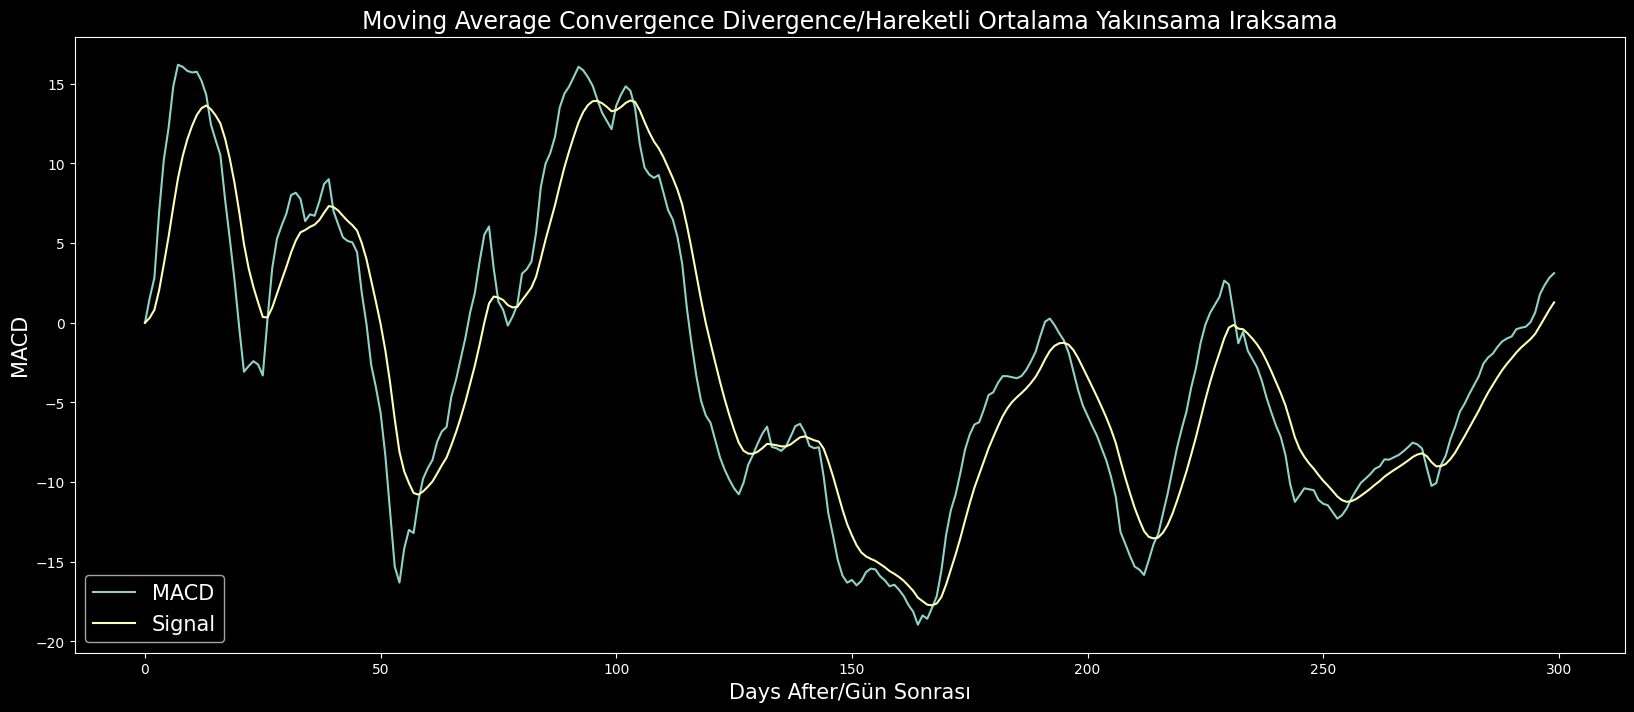

In [17]:
import os
import matplotlib.pyplot as plt

# Klasörü oluştur
os.makedirs("graphed-results", exist_ok=True)

plt.figure(figsize=(20, 8))
plt.plot(macd.to_list(), label='MACD')
plt.plot(signal.to_list(), label='Signal')
plt.title("Moving Average Convergence Divergence/Hareketli Ortalama Yakınsama Iraksama", fontsize=17)
plt.ylabel("MACD", fontsize=15)
plt.xlabel("Days After/Gün Sonrası", fontsize=15)
plt.legend(prop={'size': 15}, loc='lower left')
plt.savefig("graphed-results/MACD.png")
plt.show()


## Momentum

In [18]:
MOMENTUM_PERIOD = 10

momentum_values = []

# Iterate over the elements in 'close_prices' starting from index MOMENTUM_PERIOD
# İndex MOMENTUM_PERIOD'den başlayarak 'close_prices' listesindeki öğelerin üzerinde dolaşma
for i in range(MOMENTUM_PERIOD, len(close_prices)):
    # Get the current close price
    # Mevcut kapanış fiyatını al
    curr_close_price = close_prices[i]

    # Get the close price at the start of the period
    # Dönem başlangıcındaki kapanış fiyatını al
    period_start_close_price = close_prices[i - MOMENTUM_PERIOD]

    # Calculate the momentum value by subtracting the period start close price from the current close price
    # Momentum değerini, mevcut kapanış fiyatından dönem başlangıcındaki kapanış fiyatını çıkararak hesapla
    momentum_values.append(curr_close_price - period_start_close_price)


In [19]:
# Computing the average momentum

momentum_sum = 0

# Iterate over the elements in 'momentum_values'
# 'momentum_values' listesindeki öğelerin üzerinde dolaşma
for i in range(len(momentum_values)):
    # Add the current momentum value to the momentum sum
    # Mevcut momentum değerini momentum toplamına ekle
    momentum_sum += momentum_values[i]

# Calculate the average momentum by dividing the momentum sum by the number of momentum values
# Ortalama momentumu, momentum toplamını momentum değerlerinin sayısına böleerek hesapla
avg_momentum = momentum_sum / len(momentum_values)

# Print the average momentum
# Ortalama momentumu ekrana yazdır
print(avg_momentum)

-5.6479312239022095


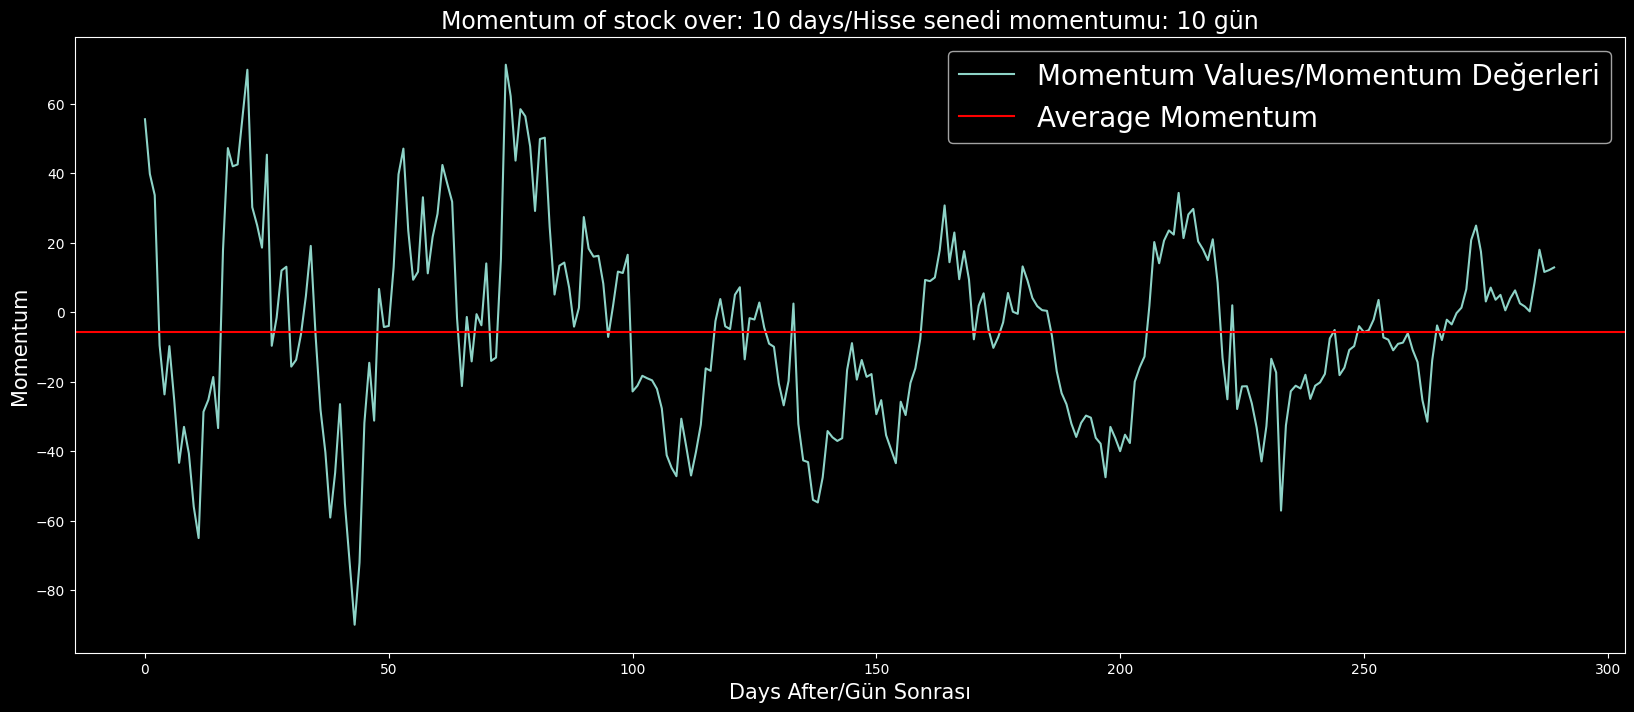

In [20]:
plt.figure(figsize=(20, 8))
plt.plot(momentum_values, label='Momentum Values/Momentum Değerleri')
plt.axhline(y=avg_momentum, label='Average Momentum', color='r')
plt.title(f"Momentum of stock over: {MOMENTUM_PERIOD} days/Hisse senedi momentumu: {MOMENTUM_PERIOD} gün", fontsize=17)
plt.ylabel("Momentum", fontsize=15)
plt.xlabel("Days After/Gün Sonrası", fontsize=15)
plt.legend(prop={'size':20})
plt.savefig("graphed-results/momentum")
plt.show()


## Resistance and Support Lines / Direnç ve Destek Hatları

In [21]:
type(close_prices)

list

### Computing the pivots Using the equation Pivot Point = (Previous Session High + Previous Session Low + Previous Session Close)/3

### Pivot Noktası = (Önceki Oturum Yüksek + Önceki Oturum Düşük + Önceki Oturum Kapanışı)/3 denklemini kullanarak pivotları hesaplama

In [22]:
pivot_points = []

# Iterate over the elements in 'close_for_calc'
# 'close_for_calc' listesindeki öğelerin üzerinde dolaşma
for i in range(len(close_for_calc)):
    if i == 0:
        # For the first element, add NaN (Not a Number) to the pivot_points list
        # İlk öğe için, pivot_points listesine NaN (Sayı Değil) ekle
        pivot_points.append(float("nan"))
    else:
        # Get the previous high, low, and close prices
        # Önceki yüksek, düşük ve kapanış fiyatlarını al
        prev_high = high_prices[i - 1]
        prev_low = low_prices[i - 1]
        prev_close = close_prices[i - 1]

        # Calculate the pivot point using the formula: (prev_high + prev_low + prev_close) / 3
        # Pivot noktasını, (önceki yüksek + önceki düşük + önceki kapanış) / 3 formülünü kullanarak hesapla
        pivot_point = (prev_high + prev_low + prev_close) / 3

        # Append the pivot point to the pivot_points list
        # Pivot noktasını pivot_points listesine ekle
        pivot_points.append(pivot_point)


### Computing the Resistance and Support levels using the equations below -


##### Resistance Level 1 = (2 x Pivot Point) – Previous Session Low
##### Support Level 1 – (2 x Pivot Point) – Previous High
##### Resistance Level 2 = (Pivot Point – Support Level 1) + Resistance Level 1 
##### Support Level 2 = Pivot Point – (Resistance Level 1 – Support Level 1) 
##### Resistance Level 3 = (Pivot Point – Support Level 2) + Resistance Level 2 
##### Support Level 3 = Pivot Point – (Resistance Level 2 – Support Level 2) 

### --------------------------------------------------------------------

### Aşağıdaki denklemleri kullanarak Direnç ve Destek seviyelerini hesaplama -


##### Direnç Seviyesi 1 = (2 x Pivot Noktası) – Önceki Oturum Düşük
##### Destek Seviyesi 1 – (2 x Pivot Noktası) – Önceki Yüksek
##### Direnç Seviyesi 2 = (Pivot Noktası – Destek Seviyesi 1) + Direnç Seviyesi 1
##### Destek Seviyesi 2 = Pivot Noktası – (Direnç Seviyesi 1 – Destek Seviyesi 1)
##### Direnç Seviyesi 3 = (Pivot Noktası – Destek Seviyesi 2) + Direnç Seviyesi 2
##### Destek Seviyesi 3 = Pivot Noktası – (Direnç Seviyesi 2 – Destek Seviyesi 2)

In [23]:
resistance_1 = []
support_1 = []
resistance_2 = []
support_2 = []

# Iterate over the elements in 'pivot_points'
# 'pivot_points' listesindeki öğelerin üzerinde dolaşma
for i in range(len(pivot_points)):
    if i == 0:
        # For the first element, add NaN (Not a Number) to the resistance_1 and support_1 lists
        # İlk öğe için, resistance_1 ve support_1 listelerine NaN (Sayı Değil) ekle
        resistance_1.append(float("nan"))
        support_1.append(float("nan"))
    else:
        # Calculate the first level of resistance (r1) and support (s1)
        # İlk direnç (r1) ve destek (s1) seviyelerini hesapla
        r1 = (2 * pivot_points[i]) - low_prices[i - 1]
        s1 = (2 * pivot_points[i]) - high_prices[i - 1]

        # Calculate the second level of resistance (r2) and support (s2)
        # İkinci direnç (r2) ve destek (s2) seviyelerini hesapla
        r2 = (pivot_points[i] - s1) + r1
        s2 = pivot_points[i] - (r1 - s1)

        # Append the calculated values to the respective lists
        # Hesaplanan değerleri ilgili listelere ekle
        resistance_1.append(r1)
        support_1.append(s1)
        resistance_2.append(r2)
        support_2.append(s2)


In [24]:
print(type(support_1))
print(len(close_prices))

<class 'list'>
300


In [25]:
first_support_cross_counter = 0

# Iterate over the elements in 'support_1' and 'close_prices'
# 'support_1' ve 'close_prices' listelerindeki öğelerin üzerinde dolaşma
for i in range(len(support_1)):
    if support_1[i] > close_prices[i]:
        # If the support level is higher than the closing price, increment the first_support_cross_counter
        # Eğer destek seviyesi kapanış fiyatından yüksekse, first_support_cross_counter'ı artır
        first_support_cross_counter += 1

# Print the value of first_support_cross_counter
# first_support_cross_counter değerini ekrana yazdır
print(first_support_cross_counter)


60


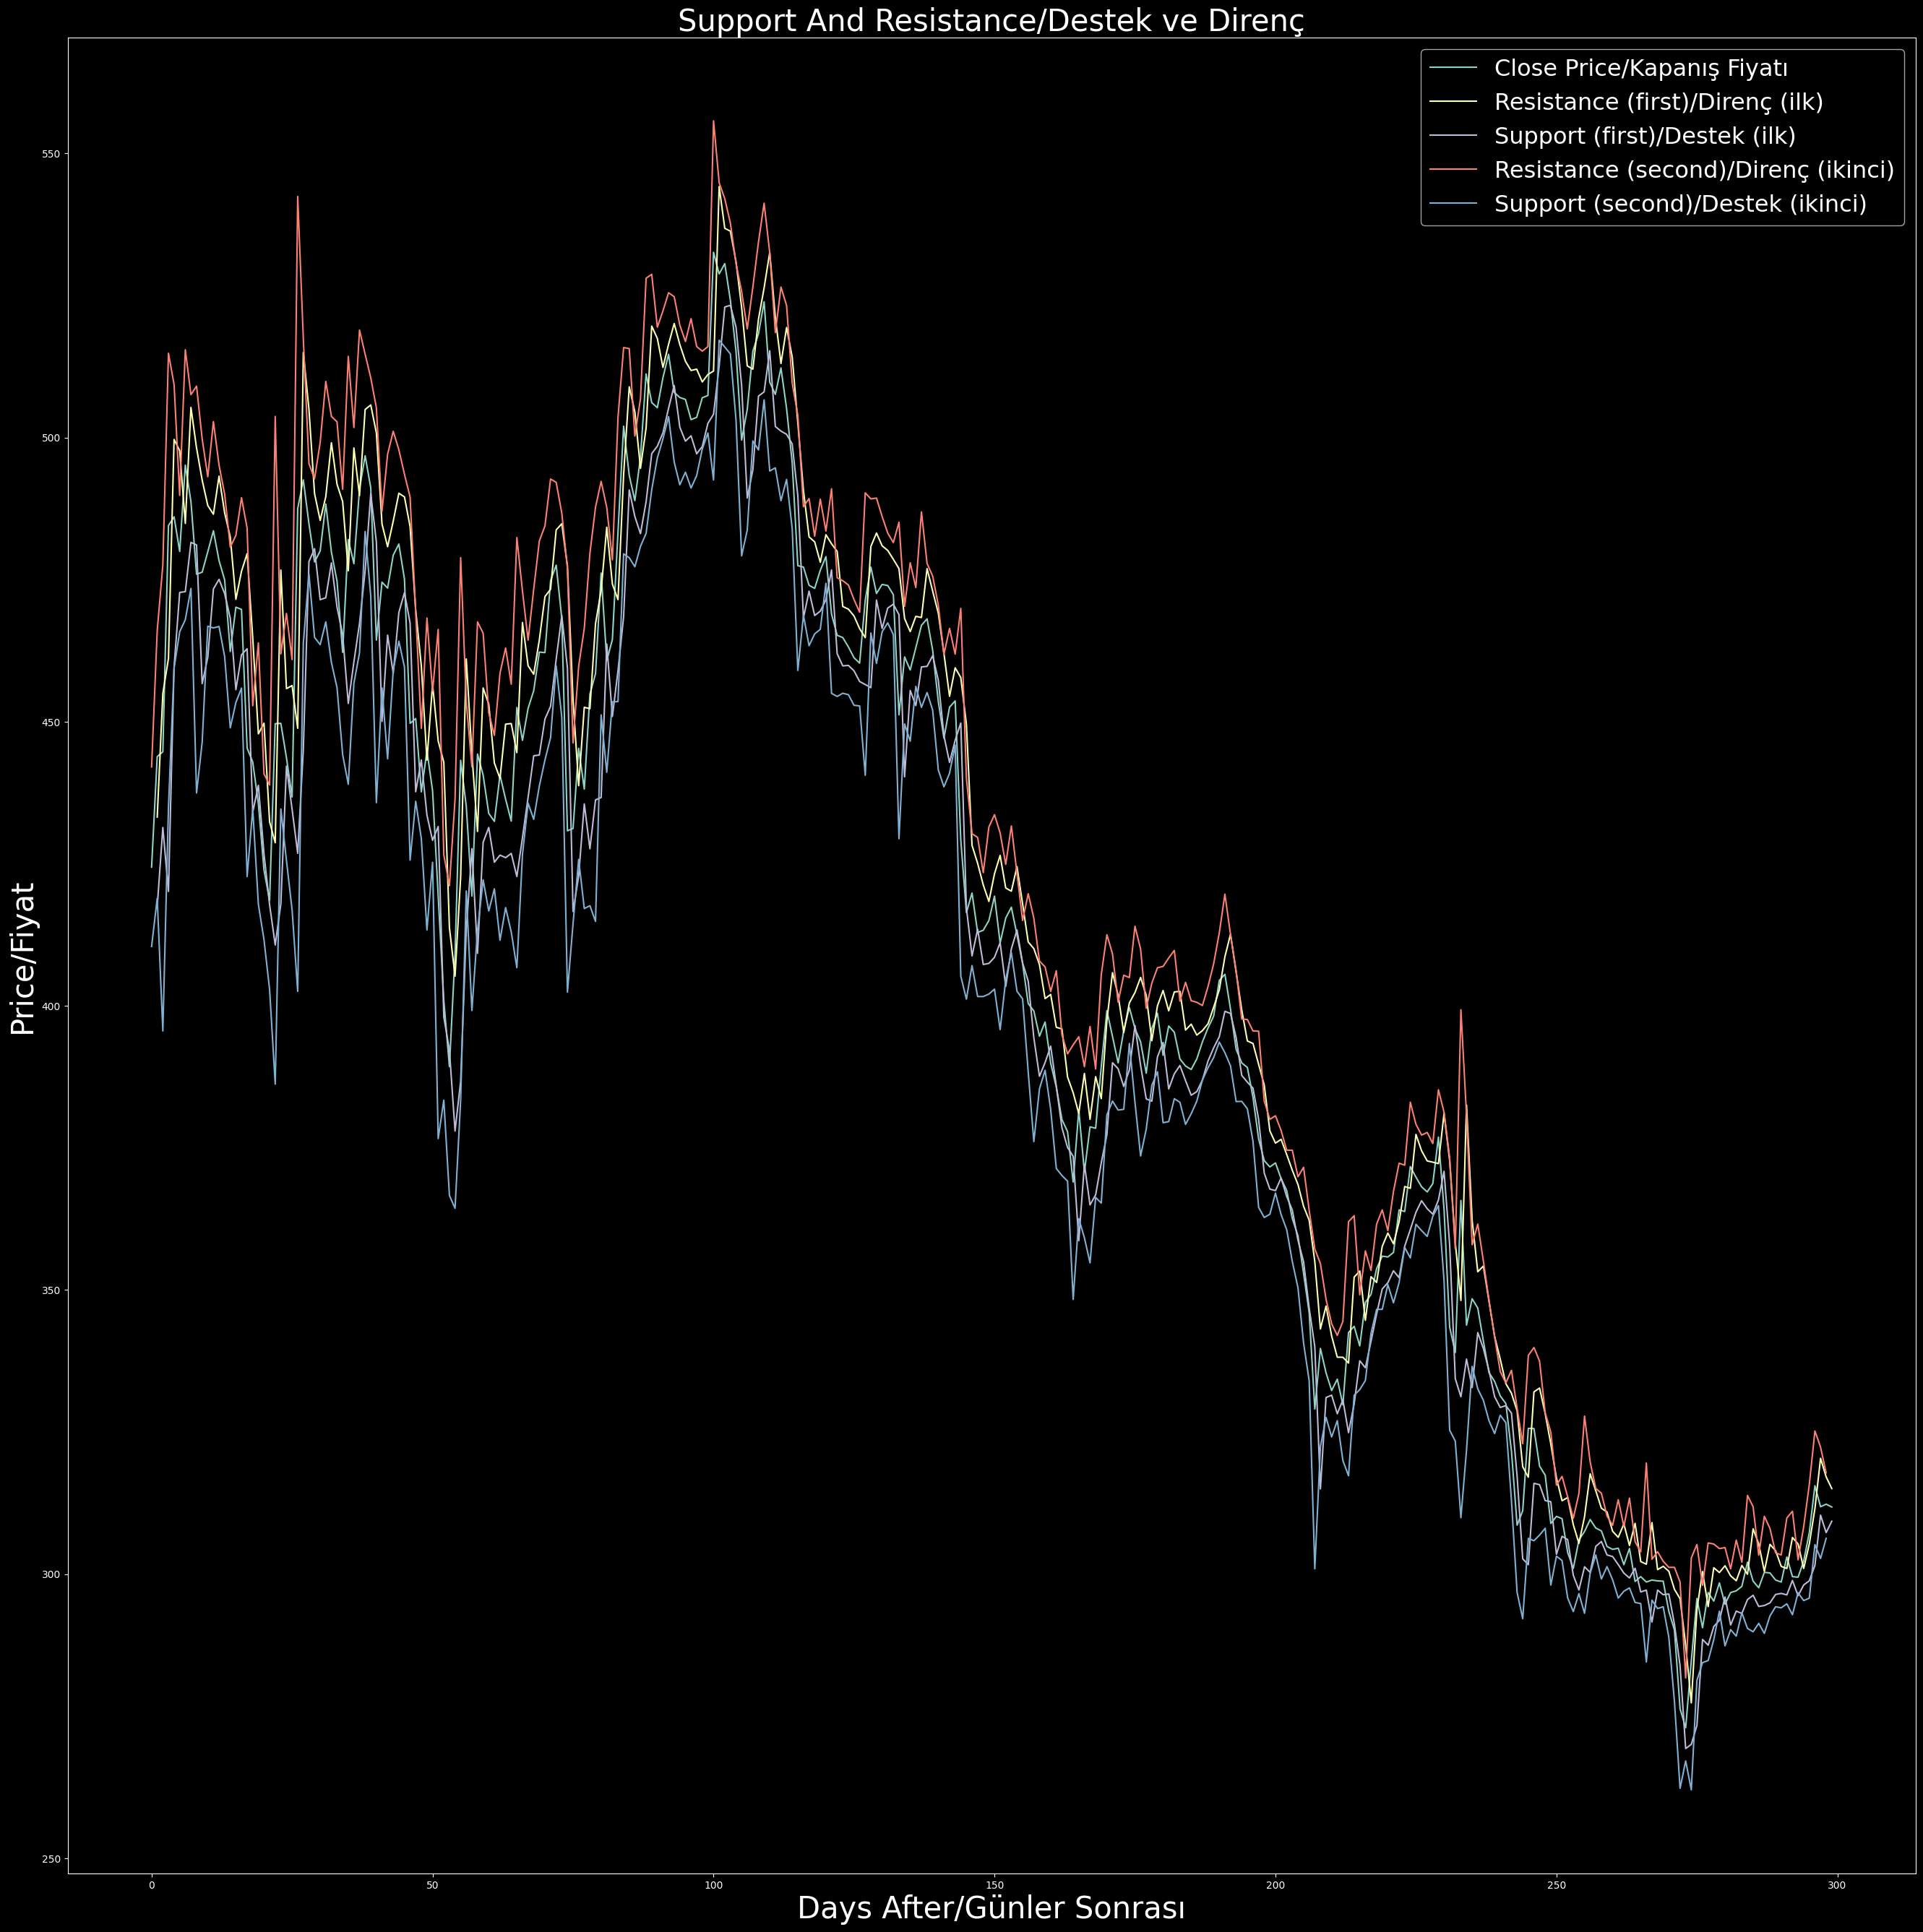

In [26]:
plt.figure(figsize=(33, 33))
plt.plot(close_prices, label='Close Price/Kapanış Fiyatı')
plt.plot(resistance_1, label='Resistance (first)/Direnç (ilk)')
plt.plot(support_1, label='Support (first)/Destek (ilk)')
plt.plot(resistance_2, label='Resistance (second)/Direnç (ikinci)')
plt.plot(support_2, label='Support (second)/Destek (ikinci)')
plt.xlabel("Days After/Günler Sonrası", fontsize=30)
plt.ylabel("Price/Fiyat", fontsize=30)
plt.title("Support And Resistance/Destek ve Direnç", fontsize=30)
plt.legend(prop = {'size' : 23})
plt.savefig("graphed-results/support and resistance")
plt.show()

## Neural Network to predict the future / Neural Network geleceği tahmin etmek için

In [27]:
dataset = close_prices

dataset = np.array(dataset)
training = len(dataset)

In [28]:
dataset = np.reshape(dataset, (dataset.shape[0], 1))

In [29]:
print(dataset.shape)

(300, 1)


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'dataset' using the MinMaxScaler
# MinMaxScaler kullanarak 'dataset'i ölçeklendir
scaled_data = scaler.fit_transform(dataset)

# Set the 'train_data' variable to the scaled data
# 'train_data' değişkenini ölçeklendirilmiş verilere ayarla
train_data = scaled_data

# Print the length of the train_data
# train_data'nın uzunluğunu ekrana yazdır
print(len(train_data))

# Prepare features and labels
# Özellikleri ve etiketleri hazırla
x_train = []
y_train = []
prediction_days = 60

# Iterate over the train_data starting from index 'prediction_days'
# 'prediction_days' indeksinden başlayarak train_data üzerinde dolaş
for i in range(prediction_days, len(train_data)):
    # Append the previous 'prediction_days' data points as features
    # Önceki 'prediction_days' veri noktalarını özellik olarak ekle
    x_train.append(train_data[i - prediction_days:i, 0])
    # Append the current data point as the label
    # Mevcut veri noktasını etiket olarak ekle
    y_train.append(train_data[i, 0])

# Convert the lists to NumPy arrays
# Listeleri NumPy dizilerine dönüştür
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the input data to fit the LSTM model's input shape
# Giriş verisini LSTM modelinin giriş şekline uyacak şekilde yeniden şekillendir
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

300


In [31]:
print(x_train.shape)

(240, 60, 1)


## LSTM Approach / LSTM Yaklaşımı

In [32]:
# RNN Using LSTMs

# SAMPLE HIGH ACCURACY MODEL
# LSTM'leri Kullanan RNN

# ÖRNEK YÜKSEK DOĞRULUKLU MODEL

model_rnn = keras.Sequential([
    # Add a bidirectional LSTM layer with 75 units, return_sequences=True, and input_shape=(x_train.shape[1], 1)
    # 75 birime sahip çift yönlü bir LSTM katmanı ekle, return_sequences=True, input_shape=(x_train.shape[1], 1)
    keras.layers.Bidirectional(keras.layers.LSTM(units=75,
                    return_sequences=True,
                    input_shape=(x_train.shape[1], 1))), 
    # Add another bidirectional LSTM layer with 64 units
    # 64 birime sahip başka bir çift yönlü LSTM katmanı ekle
    keras.layers.Bidirectional(keras.layers.LSTM(units=64)),
    # Add a dense layer with 300 units
    # 300 birime sahip bir yoğun katman ekle
    keras.layers.Dense(300),
    # Add a dense layer with 32 units
    # 32 birime sahip bir yoğun katman ekle
    keras.layers.Dense(32),
    # Add a dense layer with 1 unit
    # 1 birime sahip bir yoğun katman ekle
    keras.layers.Dense(1),
])



In [33]:
# Adding early stopping to prevent time waste in case there is no model improvement
# Model iyileştirmesi olmaması durumunda zaman kaybını önlemek için erken durdurma ekleme
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0.0008,
    patience=3,
)

model_rnn.compile(optimizer='adam',
                  loss='mse')

# Train the model using the prepared data, specifying the number of epochs, batch size, and early stopping callback
# Hazırlanan veriyi kullanarak modeli eğit, epoch sayısını, grup boyutunu ve erken durdurma geri çağrısını belirt
history = model_rnn.fit(x_train,
                        y_train,
                        epochs=20,
                        batch_size=5,
                        callbacks=[early_stopping])


Epoch 1/20
48/48 [==============================] - 6s 20ms/step - loss: 0.0219
Epoch 2/20
48/48 [==============================] - 1s 20ms/step - loss: 0.0031
Epoch 3/20
48/48 [==============================] - 1s 20ms/step - loss: 0.0036
Epoch 4/20
48/48 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 5/20
48/48 [==============================] - 1s 20ms/step - loss: 0.0031


## Transformer Approach / Transformer Yaklaşımı
Trying to fix the volitality issue by paying attention to price actions happening in small periods of time

Küçük zaman dilimlerinde gerçekleşen fiyat hareketlerine dikkat ederek oynaklık sorununu çözmeye çalışmak

In [34]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    """
    Function that applies the Transformer Encoder layer.
    Transformer Encoder katmanını uygulayan fonksiyon.

    Args:
        inputs (Tensor): Input data tensor.
        inputs (Tensor): Giriş veri tensörü.
        head_size (int): Size of the attention heads.
        head_size (int): Dikkat başlıklarının boyutu.
        num_heads (int): Number of attention heads.
        num_heads (int): Dikkat başlıklarının sayısı.
        ff_dim (int): Dimension of the feed-forward layer.
        ff_dim (int): İleri besleme katmanının boyutu.
        dropout (float): Dropout rate.
        dropout (float): Dropout oranı.

    Returns:
        Tensor: Output of the Transformer Encoder.
        Tensor: Transformer Encoder'ın çıktısı.
    """
    x = keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = keras.layers.Dropout(dropout)(x)
    res = x + inputs
    x = keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = keras.layers.Dropout(dropout)(x)
    x = keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res


def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    """
    Function that builds a model based on Transformers.
    Transformer'lara dayalı bir model oluşturan fonksiyon.

    Args:
        input_shape (tuple): Shape of the input data.
        input_shape (tuple): Giriş verisinin şekli.
        head_size (int): Size of the attention heads.
        head_size (int): Dikkat başlıklarının boyutu.
        num_heads (int): Number of attention heads.
        num_heads (int): Dikkat başlıklarının sayısı.
        ff_dim (int): Dimension of the feed-forward layer.
        ff_dim (int): İleri besleme katmanının boyutu.
        num_transformer_blocks (int): Number of Transformer blocks.
        num_transformer_blocks (int): Transformer bloklarının sayısı.
        mlp_units (list): Dimensions of the MLP (Multiple Layer Perceptron) layers.
        mlp_units (list): MLP (Çok Katmanlı Algılayıcı) katmanlarının boyutları.
        dropout (float): Dropout rate.
        dropout (float): Dropout oranı.
        mlp_dropout (float): MLP dropout rate.
        mlp_dropout (float): MLP dropout oranı.

    Returns:
        Model: Constructed Keras model.
        Model: Oluşturulan Keras modeli.
    """
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(num_transformer_blocks): 
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = keras.layers.Dense(dim, activation="elu")(x)
        x = keras.layers.Dropout(mlp_dropout)(x)
    outputs = keras.layers.Dense(1, activation="linear")(
        x)  
    return keras.Model(inputs, outputs)


input_shape = x_train.shape[1:]



In [35]:
# Callbacks/Geriçağırıcılar
callbacks = [
    keras.callbacks.EarlyStopping(patience=3),  # Early stopping callback/Erken durdurma geriçağırıcısı
]

# Model
model = build_model(
    input_shape,
    head_size=46,  # Embedding size for attention/Dikkat için gömme boyutu
    num_heads=60,  # Number of attention heads/Dikkat başlığı sayısı
    ff_dim=55,  # Hidden layer size in the feed-forward network inside the transformer/Transformatörün içindeki ileri beslemeli ağdaki gizli katman boyutu
    num_transformer_blocks=7,  # Number of transformer blocks/Transformatör bloklarının sayısı
    mlp_units=[256],  # Dimensions of the MLP (Multiple Layer Perceptron) layers/MLP (Çok Katmanlı Algılayıcı) katmanlarının boyutları
    mlp_dropout=0.4,  # Dropout rate for the MLP layers/MLP katmanları için dropout oranı
    dropout=0,  # Dropout rate for other layers/Diğer katmanlar için dropout oranı
)

model.compile(
    loss="mean_squared_error",  # Loss function for training/Eğitim için kayıp fonksiyonu
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),  # Adam optimizer with a learning rate of 1e-3/1e-3 öğrenme oranıyla Adam optimizasyonu
    metrics=["mean_squared_error"],  # Metric to evaluate the model's performance/Modelin performansını değerlendirmek için metrik
)

# Training/Eğitim
history = model.fit(
    x_train,
    y_train,
    validation_split=0.01,  # Fraction of the training data to be used for validation/Doğrulama için kullanılacak eğitim verisinin fraksiyonu
    epochs=10,  # Number of training epochs/Eğitim için dönem sayısı
    batch_size=32,  # Batch size for training/Eğitim için toplu boyutu
    callbacks=callbacks,  # List of callbacks to be used during training/Eğitim sırasında kullanılacak geriçağırıcıların listesi
)


Epoch 1/10
8/8 [==============================] - 21s 2s/step - loss: 0.1638 - mean_squared_error: 0.1638 - val_loss: 0.2033 - val_mean_squared_error: 0.2033
Epoch 2/10
8/8 [==============================] - 12s 2s/step - loss: 0.0916 - mean_squared_error: 0.0916 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.1522 - val_mean_squared_error: 0.1522
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 7/10
8/8 [==============================] - 11

In [36]:
model.save("transformer-model-v1.1/")

INFO:tensorflow:Assets written to: transformer-model-v1.1/assets


INFO:tensorflow:Assets written to: transformer-model-v1.1/assets


## Transformer Predictions / Tahmileri

In [37]:
test_data = scaled_data

# Prepare test feature and labels
# Test verisi için özellik ve etiketleri hazırla
x_test = []
y_test = []
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i, 0])
    y_test.append(test_data[i, 0])

x_test = np.array(x_test)
print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Perform predictions using the trained model
# Eğitilmiş modeli kullanarak tahminler yap
transformer_predictions = model.predict(x_test)

# Inverse transform the scaled predictions to obtain the actual values
# Ölçeklendirilmiş tahminleri ters dönüşüm yaparak gerçek değerlere dönüştür
transformer_predictions = scaler.inverse_transform(transformer_predictions)

(240, 60)
8/8 [==============================] - 6s 649ms/step


In [38]:
y_test = np.array(y_test)

In [39]:
type(y_test)

numpy.ndarray

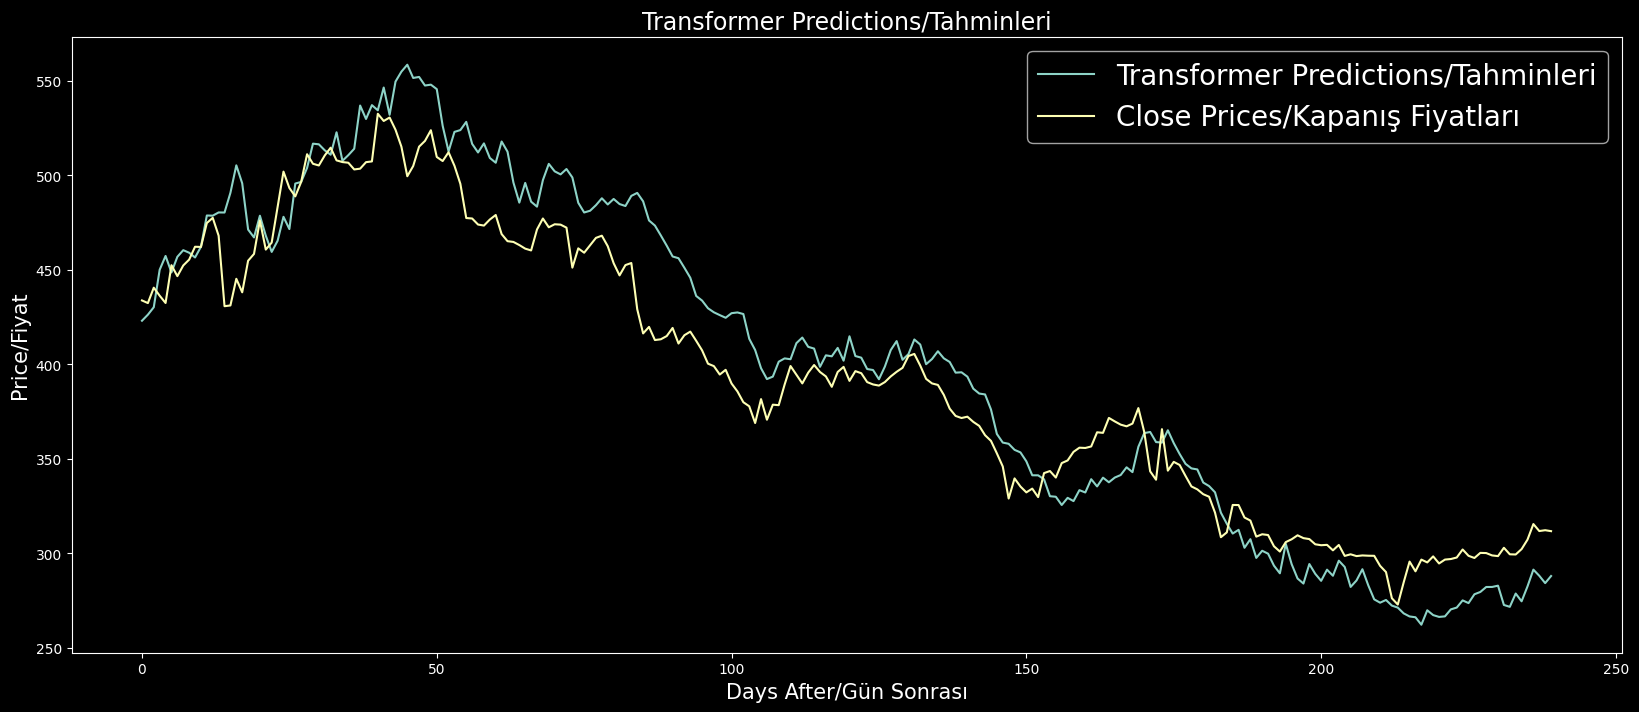

In [40]:
plt.figure(figsize=(20, 8))
plt.plot(transformer_predictions, label='Transformer Predictions/Tahminleri')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Close Prices/Kapanış Fiyatları')
plt.title("Transformer Predictions/Tahminleri", fontsize=17)
plt.xlabel("Days After/Gün Sonrası", fontsize=15)
plt.ylabel("Price/Fiyat", fontsize=15)
plt.legend(prop={'size': 20})
plt.show()


## Transformer Future Predictions/Gelecek Tahminleri

In [41]:
# Get the current price data for prediction
# Tahmin için mevcut fiyat verisini al
curr_price = close_prices[len(close_prices) - prediction_days:len(close_prices)]

# Convert the current price to a numpy array and reshape it
# Mevcut fiyatı numpy dizisine dönüştür ve yeniden şekillendir
curr_price = np.array(curr_price)
curr_price = curr_price.reshape(-1, 1)

# Scale the current price using the same scaler as the training data
# Eğitim verilerinde kullanılan ölçekleyiciyi kullanarak mevcut fiyatı ölçeklendir
curr_price = scaler.transform(curr_price)

# Reshape the current price to match the input shape of the model
# Mevcut fiyatı modele uygun giriş şekline yeniden şekillendir
curr_price = curr_price.reshape(1, prediction_days, 1)


In [42]:
next_day_pred = model.predict(curr_price)
next_day_pred = scaler.inverse_transform(next_day_pred)


1/1 [==============================] - 0s 31ms/step


In [43]:
# model.save("transformer-model-v1.1/")

In [44]:
import numpy as np

prediction_days = 60

# Get the current price data for prediction
# Tahmin için mevcut fiyat verisini al
curr_price = close_prices[len(close_prices) - prediction_days:len(close_prices)]

# Check if there is enough data for prediction
# Tahmin için yeterli veri olup olmadığını kontrol et
if len(curr_price) < prediction_days:
    print("Yeterli veri yok.")
else:
    # Convert the current price to a numpy array and scale it
    # Mevcut fiyatı numpy dizisine dönüştür ve ölçekle
    curr_price = np.array(curr_price)
    curr_price = scaler.transform(curr_price.reshape(-1, 1))

    # Reshape the current price to match the input shape of the model
    # Mevcut fiyatı modele uygun giriş şekline yeniden şekillendir
    curr_price = np.reshape(curr_price, (1, prediction_days, 1))

    # Make the prediction for the next day's price
    # Gelecek günün fiyatı için tahmin yap
    next_day_pred = model.predict(curr_price)

    # Inverse scale the predicted price to its original value
    # Tahmin edilen fiyatı orijinal değerine dönüştür
    next_day_pred = scaler.inverse_transform(next_day_pred)

    # Store the predicted prices for multiple future days
    # Birden fazla gelecek gün için tahmin edilen fiyatları sakla
    transformer_pred_prices = []
    NUM_OF_FUTURE_DAYS = 10
    transformer_tot_close_prices = list(close_prices)

    for i in range(NUM_OF_FUTURE_DAYS + 1):
        curr_price = transformer_tot_close_prices[len(transformer_tot_close_prices) - prediction_days: len(transformer_tot_close_prices)]
        if len(curr_price) < prediction_days:
            print("Yeterli veri yok.")
            break
        else:
            curr_price = np.array(curr_price)
            curr_price = scaler.transform(curr_price.reshape(-1, 1))
            curr_price = np.reshape(curr_price, (1, prediction_days, 1))
            next_day_pred = model.predict(curr_price)
            next_day_pred = scaler.inverse_transform(next_day_pred)
            transformer_pred_prices.append(next_day_pred)
            transformer_tot_close_prices.append(next_day_pred)


1/1 [==============================] - 0s 27ms/step


C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_19120\4067178975.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_19120\4067178975.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_19120\4067178975.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is d

1/1 [==============================] - ETA: 0s

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_19120\4067178975.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_19120\4067178975.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_19120\4067178975.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is d

1/1 [==============================] - 0s 30ms/step


C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_19120\4067178975.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_19120\4067178975.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)


In [45]:
# Convert the list of predicted prices to a numpy array
# Tahmin edilen fiyatların listesini bir numpy dizisine dönüştür
pred_prices = np.array(transformer_pred_prices)

# Reshape the predicted prices to match the desired shape
# Tahmin edilen fiyatları istenen şekle yeniden şekillendir
pred_prices = np.reshape(pred_prices, (pred_prices.shape[0]))

c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


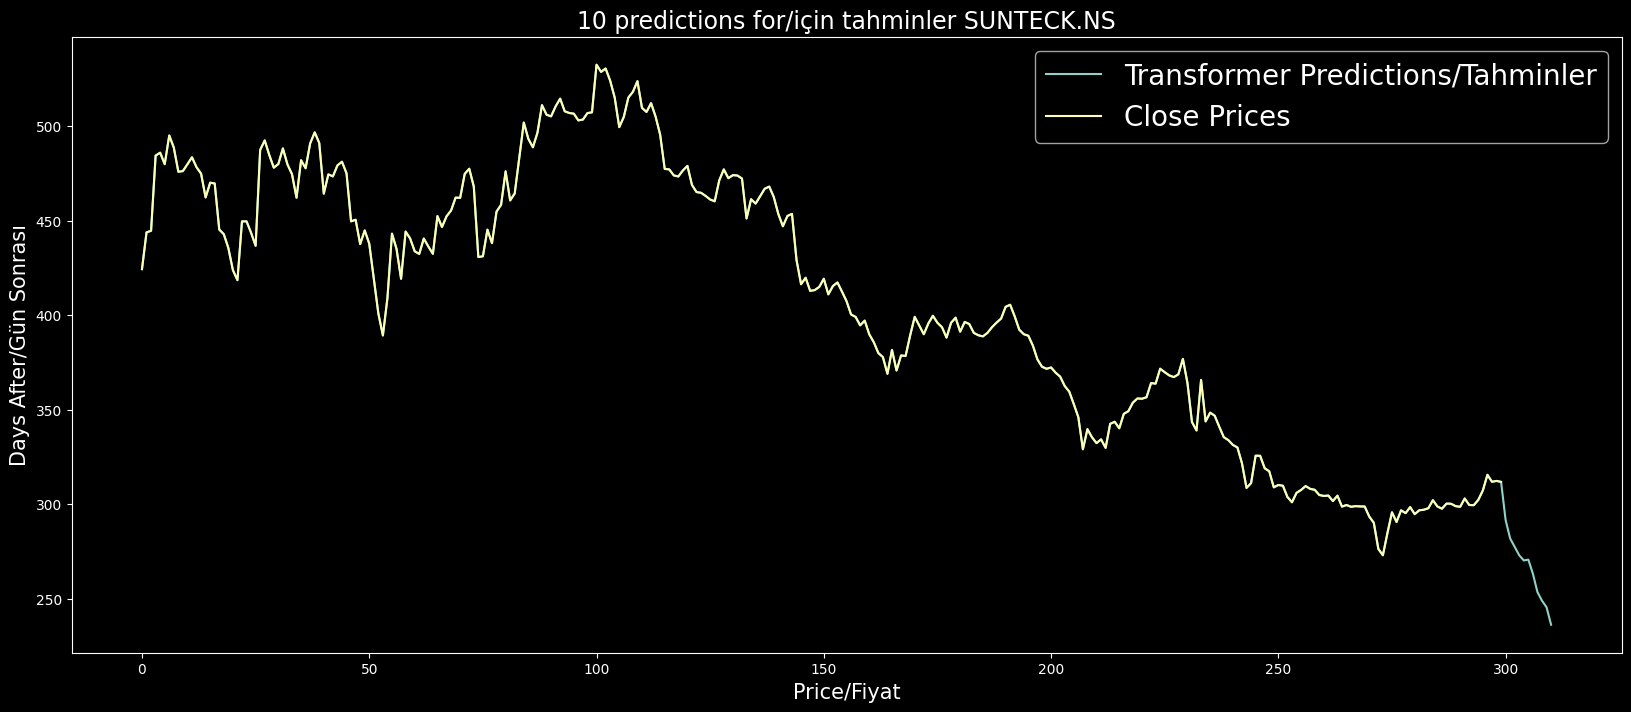

In [46]:
plt.figure(figsize=(20, 8))
plt.plot(transformer_tot_close_prices, label='Transformer Predictions/Tahminler')
plt.plot(close_prices, label='Close Prices')
plt.title(f"{NUM_OF_FUTURE_DAYS} predictions for/için tahminler {ticker}", fontsize=17)
plt.xlabel("Price/Fiyat", fontsize=15)
plt.ylabel("Days After/Gün Sonrası", fontsize=15)
plt.legend(prop={'size': 20})
plt.show()


In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 60, 1)       2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 60, 1)       19321       ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

## RNN Future Predictions / RNN Gelecek Tahminleri

In [48]:
# Assign the scaled data to the test_data variable
# Ölçeklendirilmiş verileri test_data değişkenine atayın
test_data = scaled_data

# Initialize empty lists to store the input and output sequences for testing
# Test için giriş ve çıkış dizilerini depolamak için boş listeleri başlatın
x_test = []
y_test = []

# Generate input and output sequences for testing
# Test için giriş ve çıkış dizilerini oluşturun
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i - prediction_days:i, 0])
    y_test.append(test_data[i, 0])

# Convert the input and output sequences to numpy arrays
# Giriş ve çıkış dizilerini numpy dizilerine dönüştürün
x_test = np.array(x_test)
y_test = np.array(y_test)

# Reshape the input sequences to match the desired shape
# Giriş dizilerini istenen şekle yeniden şekillendirin
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions on the test data
# Test verileri üzerinde tahminler yapın
predictions = model_rnn.predict(x_test)

# Inverse scale the predicted values to obtain actual prices
# Tahmin edilen değerleri gerçek fiyatları elde etmek için ters ölçeklendirin
predictions = scaler.inverse_transform(predictions)


8/8 [==============================] - 2s 13ms/step


In [49]:
y_test = np.array(y_test)

In [50]:
print(predictions[0:5])

[[428.49948]
 [430.79172]
 [432.13565]
 [434.8859 ]
 [436.04077]]


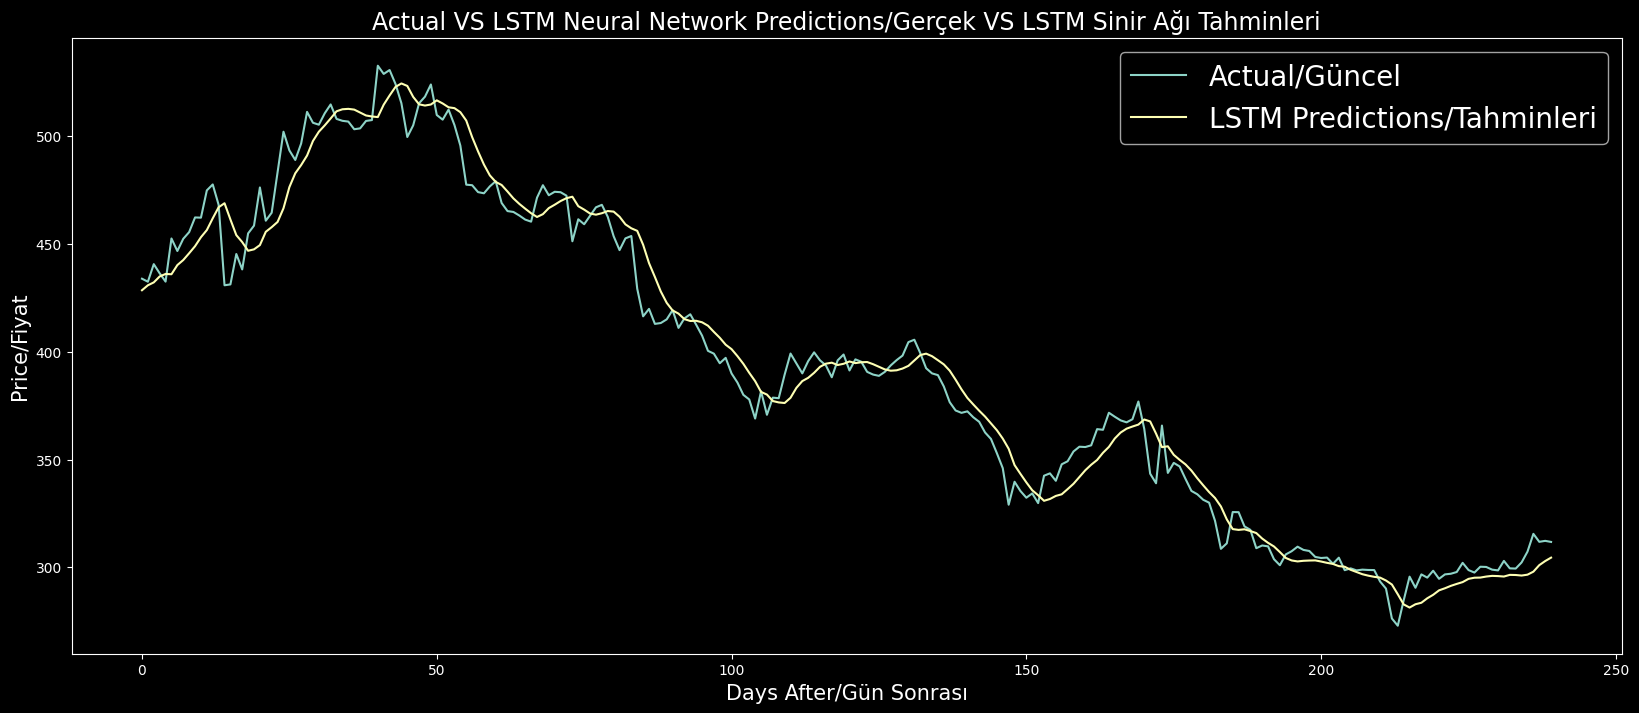

In [51]:
plt.figure(figsize=(20, 8))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual/Güncel')
plt.plot(predictions, label='LSTM Predictions/Tahminleri')
plt.title("Actual VS LSTM Neural Network Predictions/Gerçek VS LSTM Sinir Ağı Tahminleri", fontsize=17)
plt.xlabel("Days After/Gün Sonrası", fontsize=15) 
plt.ylabel("Price/Fiyat", fontsize=15)
plt.legend(prop = {'size' : 20})
plt.show()

In [52]:
# Get the last `prediction_days` number of close prices from the original dataset
# Orjinal veri setinden son `prediction_days` sayısındaki kapanış fiyatlarını alın
curr_price = close_prices[len(close_prices) - prediction_days:len(close_prices)]

# Convert the `curr_price` list to a numpy array
# `curr_price` listesini bir numpy dizisine dönüştürün
curr_price = np.array(curr_price)

# Reshape the `curr_price` array to match the expected shape for scaling
# `curr_price` dizisini ölçeklendirme için beklenen şekle getirin
curr_price = scaler.transform(curr_price.reshape(-1, 1))

In [53]:
# Reshape the `curr_price` array to match the input shape of the model
# `curr_price` dizisini modele uygun giriş şekline getirin
curr_price = np.reshape(curr_price, (curr_price.shape[0], curr_price.shape[1], 1))

In [54]:
# Make predictions on the `curr_price` using the RNN model
# RNN modelini kullanarak `curr_price` üzerinde tahminler yapın
next_day_pred = model_rnn.predict(curr_price)

# Rescale the predicted values to their original scale
# Tahmin edilen değerleri orijinal ölçeklerine geri dönüştürün
next_day_pred = scaler.inverse_transform(next_day_pred)

2/2 [==============================] - 1s 3ms/step


In [55]:
print(close_prices[len(close_prices) - 1])
print(next_day_pred[0][0])

311.79998779296875
298.3794


In [56]:
# Get the current price for prediction
# Tahmin için mevcut fiyatı alın
curr_price = close_prices[len(close_prices) - prediction_days:len(close_prices)]

# Convert the current price to a NumPy array
# Mevcut fiyatı NumPy dizisine dönüştürün
curr_price = np.array(curr_price)

# Rescale the current price to the range used during training
# Mevcut fiyatı eğitim sırasında kullanılan aralığa yeniden ölçeklendirin
curr_price = scaler.transform(curr_price.reshape(-1, 1))

# Reshape the current price to match the input shape of the model
# Mevcut fiyatın modelin giriş şekline uyacak şekilde yeniden şekillendirilmesi
curr_price = np.reshape(curr_price, (1, curr_price.shape[0], 1))

# Make predictions on the current price using the RNN model
# RNN modelini kullanarak mevcut fiyat üzerinde tahminler yapın
next_day_pred = model_rnn.predict(curr_price)

# Rescale the predicted value to its original scale
# Tahmin edilen değeri orijinal ölçeğine geri dönüştürün
next_day_pred = scaler.inverse_transform(next_day_pred)

# Print the current price and the predicted price for the next day
# Mevcut fiyatı ve bir sonraki gün için tahmin edilen fiyatı yazdırın
print("Current price:", close_prices[len(close_prices) - 1])
print("Predicted price for the next day:", next_day_pred[0][0])

# Predict future prices for a specified number of days
# Belirtilen gün sayısı için gelecekteki fiyatları tahmin edin
pred_prices = []
NUM_OF_FUTURE_DAYS = 15
tot_close_prices = list(close_prices)

for i in range(NUM_OF_FUTURE_DAYS + 1):
    # Get the current price for prediction
    # Tahmin için mevcut fiyatı alın
    curr_price = tot_close_prices[len(tot_close_prices) - prediction_days: len(tot_close_prices)]

    # Convert the current price to a NumPy array
    # Mevcut fiyatı NumPy dizisine dönüştürün
    curr_price = np.array(curr_price)

    # Rescale the current price to the range used during training
    # Mevcut fiyatı eğitim sırasında kullanılan aralığa yeniden ölçeklendirin
    curr_price = scaler.transform(curr_price.reshape(-1, 1))

    # Reshape the current price to match the input shape of the model
    # Mevcut fiyatın modelin giriş şekline uyacak şekilde yeniden şekillendirilmesi
    curr_price = np.reshape(curr_price, (1, curr_price.shape[0], 1))

    # Make predictions on the current price using the RNN model
    # RNN modelini kullanarak mevcut fiyat üzerinde tahminler yapın
    next_day_pred = model_rnn.predict(curr_price)

    # Rescale the predicted value to its original scale
    # Tahmin edilen değeri orijinal ölçeğine geri dönüştürün
    next_day_pred = scaler.inverse_transform(next_day_pred)

    # Append the predicted price to the list of predicted prices
    # Tahmin edilen fiyatı tahmin edilen fiyatların listesine ekleyin
    pred_prices.append(next_day_pred)

    # Append the predicted price to the list of total close prices
    # Tahmin edilen fiyatı toplam kapanış fiyatlarının listesine ekleyin
    tot_close_prices.append(next_day_pred[0][0])


1/1 [==============================] - 0s 17ms/step
Current price: 311.79998779296875
Predicted price for the next day: 305.611
1/1 [==============================] - 0s 18ms/step


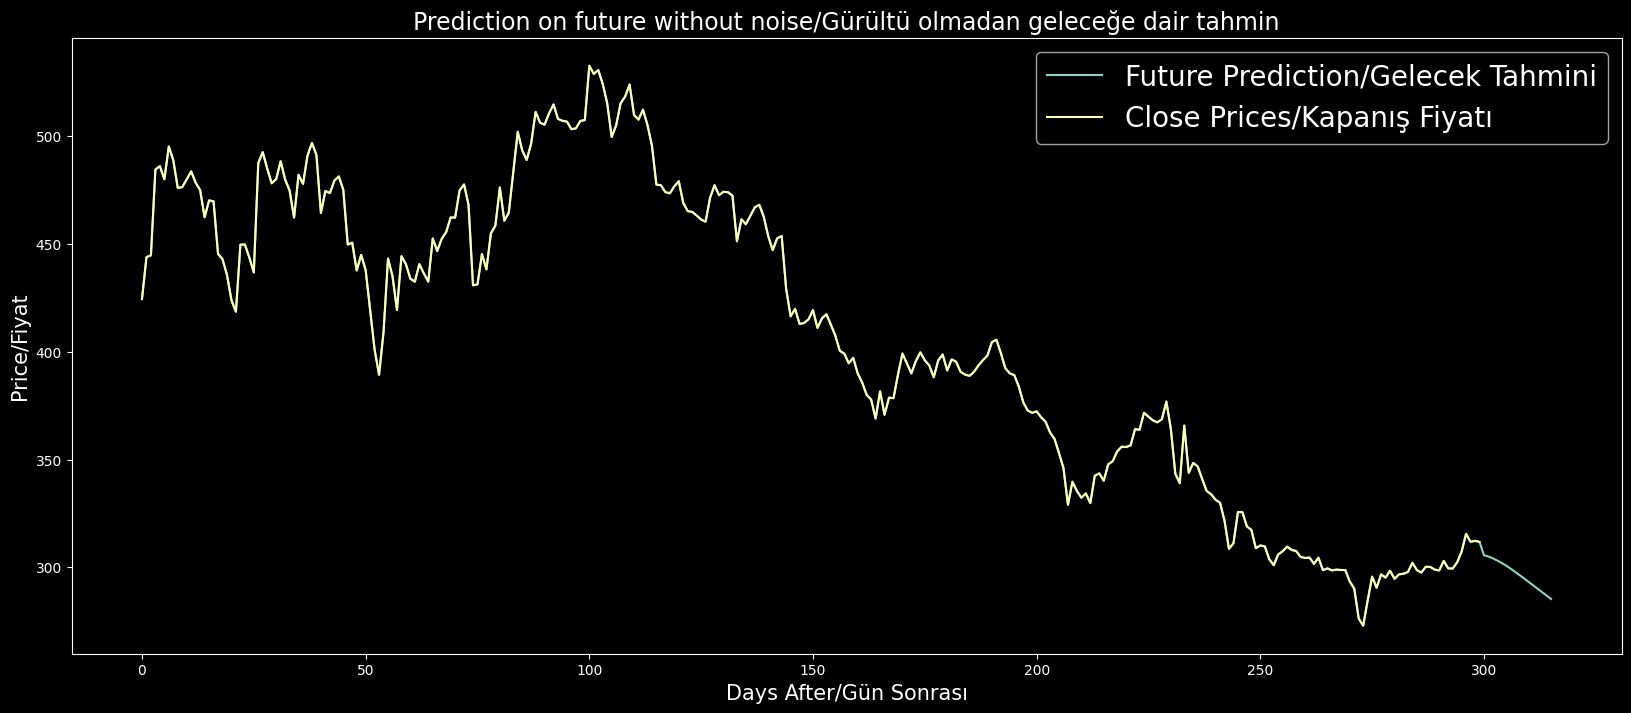

In [57]:
plt.figure(figsize=(20, 8))
plt.plot(tot_close_prices, label='Future Prediction/Gelecek Tahmini')
plt.plot(close_prices, label='Close Prices/Kapanış Fiyatı')
plt.title("Prediction on future without noise/Gürültü olmadan geleceğe dair tahmin", fontsize=17)
plt.xlabel("Days After/Gün Sonrası", fontsize=15)
plt.ylabel("Price/Fiyat", fontsize=15)
plt.legend(prop = {'size' : 20})
plt.savefig(f"graphed-results/future trend over {NUM_OF_FUTURE_DAYS} days")
plt.show()


## Linear Regression Model to predict the future price / Gelecekteki fiyatı tahmin etmek için Doğrusal Regresyon Modeli

In [58]:
# Reshape x_train to match the desired shape
# x_train'i istenen şekle dönüştürün
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))

In [59]:
# Fit the Linear Regression model
# Doğrusal Regresyon modelini eğit
reg = LinearRegression().fit(x_train, y_train)

# Print the R-squared score of the model on the training data
# Modelin eğitim verisi üzerindeki R-kare skorunu yazdır
print(reg.score(x_train, y_train))

0.9911859274493116


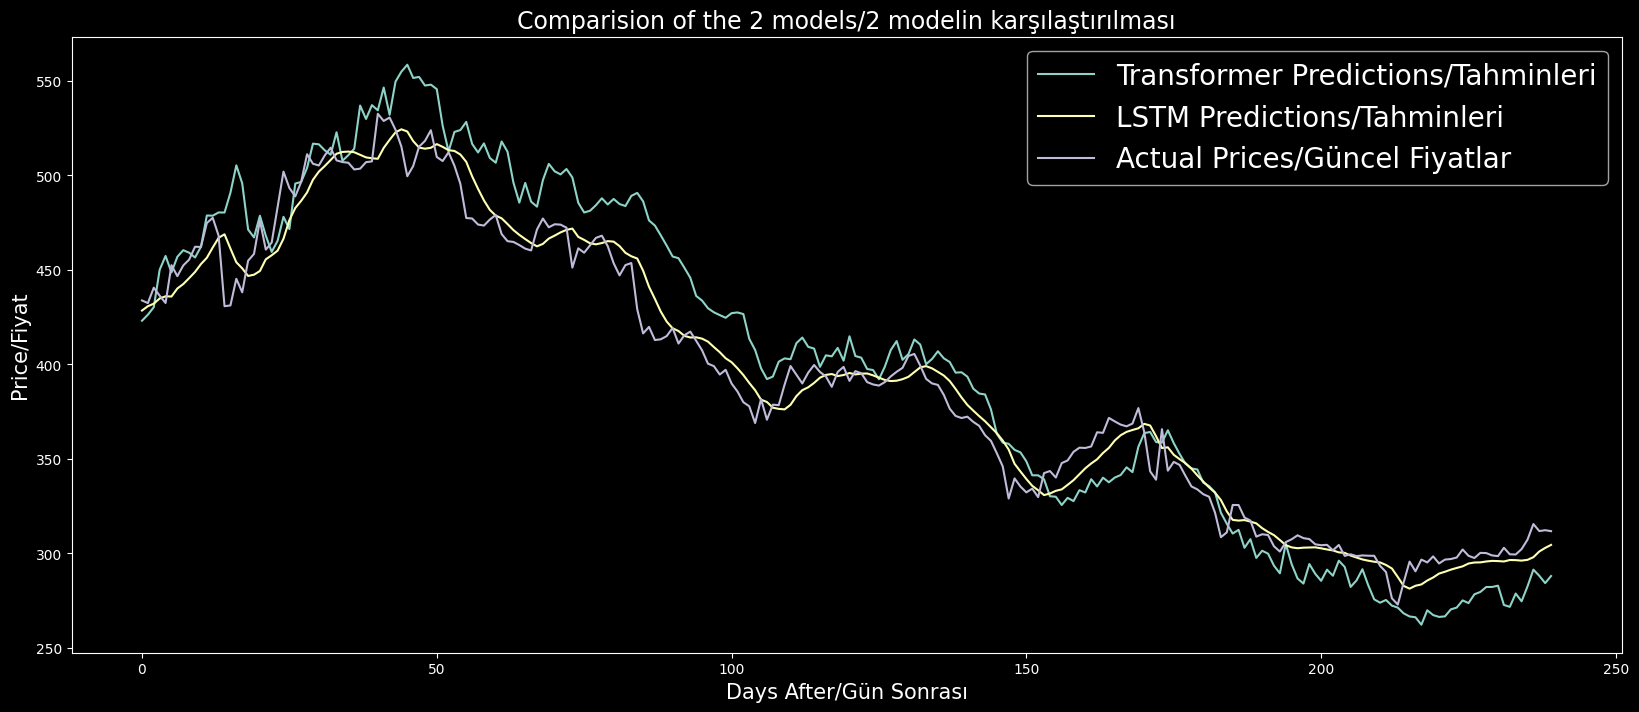

In [60]:
plt.figure(figsize=(20, 8))
plt.plot(transformer_predictions, label='Transformer Predictions/Tahminleri')
plt.plot(predictions, label='LSTM Predictions/Tahminleri')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Prices/Güncel Fiyatlar')
plt.legend(prop={'size': 20})
plt.xlabel("Days After/Gün Sonrası", fontsize=15)
plt.ylabel("Price/Fiyat", fontsize=15)
plt.title("Comparision of the 2 models/2 modelin karşılaştırılması", fontsize=17)
plt.show()


## Computing Volitality over the prediction days period of the Stock to implement as noise

## Noise olarak uygulamak için Stock'un tahmin günleri boyunca Volitality'yi hesaplama

In [61]:
volatility_calc_period = 60  # Volatility calculation period / Volatilite hesaplama periyodu
price_sum = 0  # Sum of prices / Fiyatların toplamı

# Calculate the sum of prices for the volatility calculation period
# Volatilite hesaplama periyodu için fiyatların toplamını hesapla
for i in range(len(close_prices) - volatility_calc_period, len(close_prices)):
    price_sum += close_prices[i]

price_avg = price_sum / volatility_calc_period  # Calculate the average price / Ortalama fiyatı hesapla

print(price_avg)  # Print the average price / Ortalama fiyatı yazdır

303.60333353678385


In [62]:
diffs = []  # List to store the squared differences / Karelerin listesini depolamak için

# Calculate the squared differences for the volatility calculation period
# Volatilite hesaplama periyodu için kare farkları hesapla
for i in range(len(close_prices) - volatility_calc_period, len(close_prices)):
    diffs.append(pow(close_prices[i] - price_avg, 2))

diffs = np.array(diffs)  # Convert the list to a NumPy array / Listeyi NumPy dizisine dönüştür
diffs_sum = np.sum(diffs)  # Calculate the sum of squared differences / Kare farkların toplamını hesapla

In [63]:
variance = diffs_sum / volatility_calc_period  # Calculate the variance / Varyansı hesapla

standard_deviation = math.sqrt(variance)  # Calculate the standard deviation / Standart sapmayı hesapla

print(standard_deviation)

10.846449479189051


## Generating noise based on the standard deviation of the data over the specified period

## Belirtilen süre boyunca verilerin standart sapmasına dayalı gürültü oluşturma

In [64]:
pred_prices_noisy = []  # List to store noisy predicted prices / Gürültülü tahmin edilen fiyatları depolamak için liste
lower_bound = int(round(0.3 * standard_deviation))  # Calculate the lower bound for the noise / Gürültü için alt sınırı hesapla

for i in range(len(pred_prices)):
    noise = random.randint(lower_bound, round(standard_deviation))  # Generate random noise within the lower bound and standard deviation range / Alt sınıra ve standart sapma aralığına göre rastgele gürültü oluştur
    pred_prices_noisy.append(pred_prices[i] + noise)  # Add the noise to the predicted price and append to the noisy predictions list / Gürültüyü tahmin edilen fiyata ekle ve gürültülü tahminler listesine ekle

pred_prices_noisy = np.array(pred_prices_noisy)  # Convert the list to NumPy array / Listeyi NumPy dizisine dönüştür
pred_prices_noisy = np.reshape(pred_prices_noisy, (pred_prices_noisy.shape[0]))  # Reshape the array to have a single dimension / Diziyi tek boyutlu hale getir

pred_prices = np.array(pred_prices)  # Convert the original predictions list to NumPy array / Orijinal tahminler listesini NumPy dizisine dönüştür
pred_prices = np.reshape(pred_prices, (pred_prices.shape[0]))  # Reshape the array to have a single dimension / Diziyi tek boyutlu hale getir

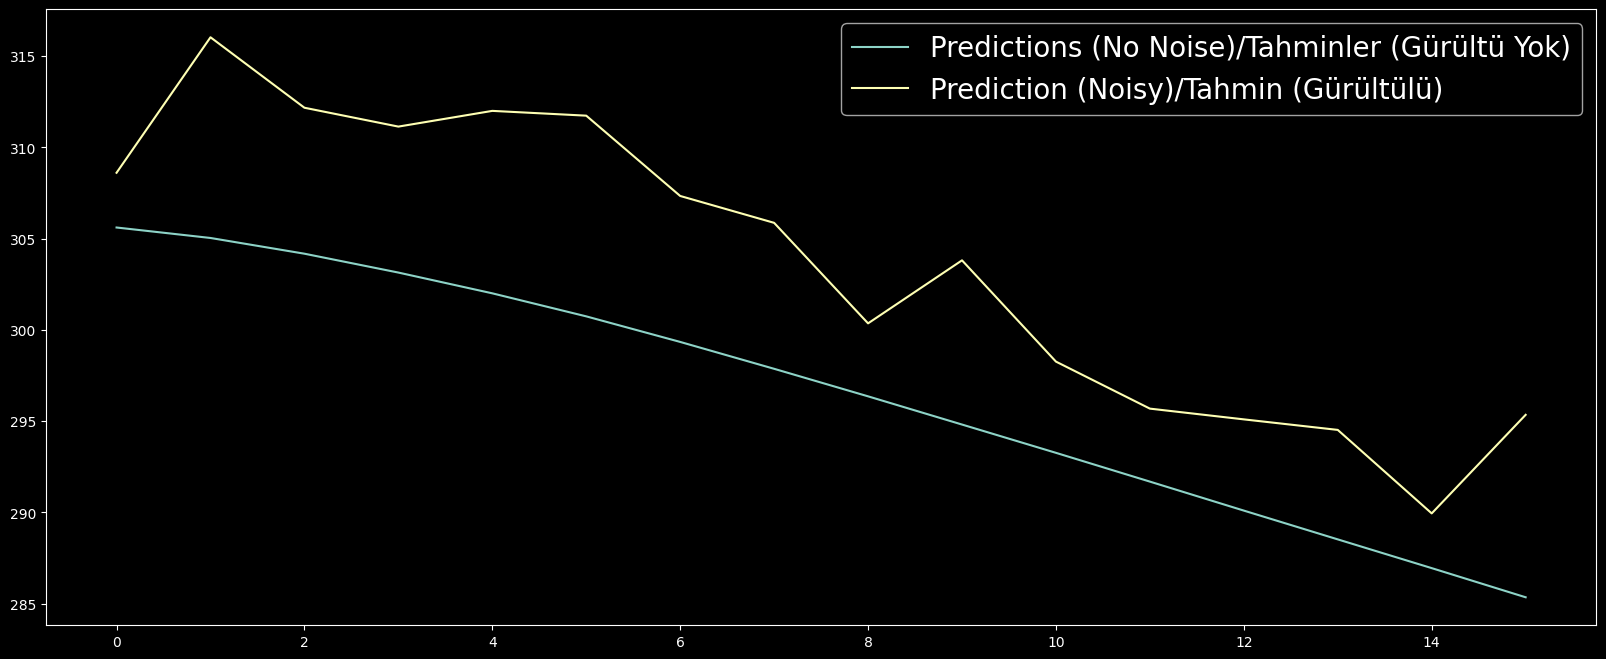

In [65]:
plt.figure(figsize=(20, 8))
plt.plot(pred_prices, label='Predictions (No Noise)/Tahminler (Gürültü Yok)')
plt.plot(pred_prices_noisy, label='Prediction (Noisy)/Tahmin (Gürültülü)')
plt.legend(prop = {'size': 20})
plt.show()

## Auto trading strategy / Otomatik ticaret stratejisi

## Strategy

### 1 :- Checking if rsi > 45 indicating a buy position. 
### 2 :- Checking if the momentum on the rsi is strong. 

### ---------------------------------------

## Strateji

### 1 : - rsi > 45 olup olmadığının kontrol edilmesi, bir satın alma pozisyonunu gösterir.
### 2 : - rsi üzerindeki momentumun güçlü olup olmadığını kontrol etme.

In [66]:
def calc_sma(data, days):
    sma = data.rolling(days).mean().to_list()  # Calculate the Simple Moving Average (SMA) using the rolling mean function / Hareketli Ortalama'yı (SMA) hesaplamak için hareketli ortalama fonksiyonunu kullan
    return sma


sma_5 = calc_sma(close_for_calc, 5)  # Calculate the 5-day Simple Moving Average (SMA) / 5 günlük Hareketli Ortalama'yı (SMA) hesapla
sma_10 = calc_sma(close_for_calc, 10)  # Calculate the 10-day Simple Moving Average (SMA) / 10 günlük Hareketli Ortalama'yı (SMA) hesapla
sma_20 = calc_sma(close_for_calc, 20)  # Calculate the 20-day Simple Moving Average (SMA) / 20 günlük Hareketli Ortalama'yı (SMA) hesapla
sma_30 = calc_sma(close_for_calc, 30)  # Calculate the 30-day Simple Moving Average (SMA) / 30 günlük Hareketli Ortalama'yı (SMA) hesapla

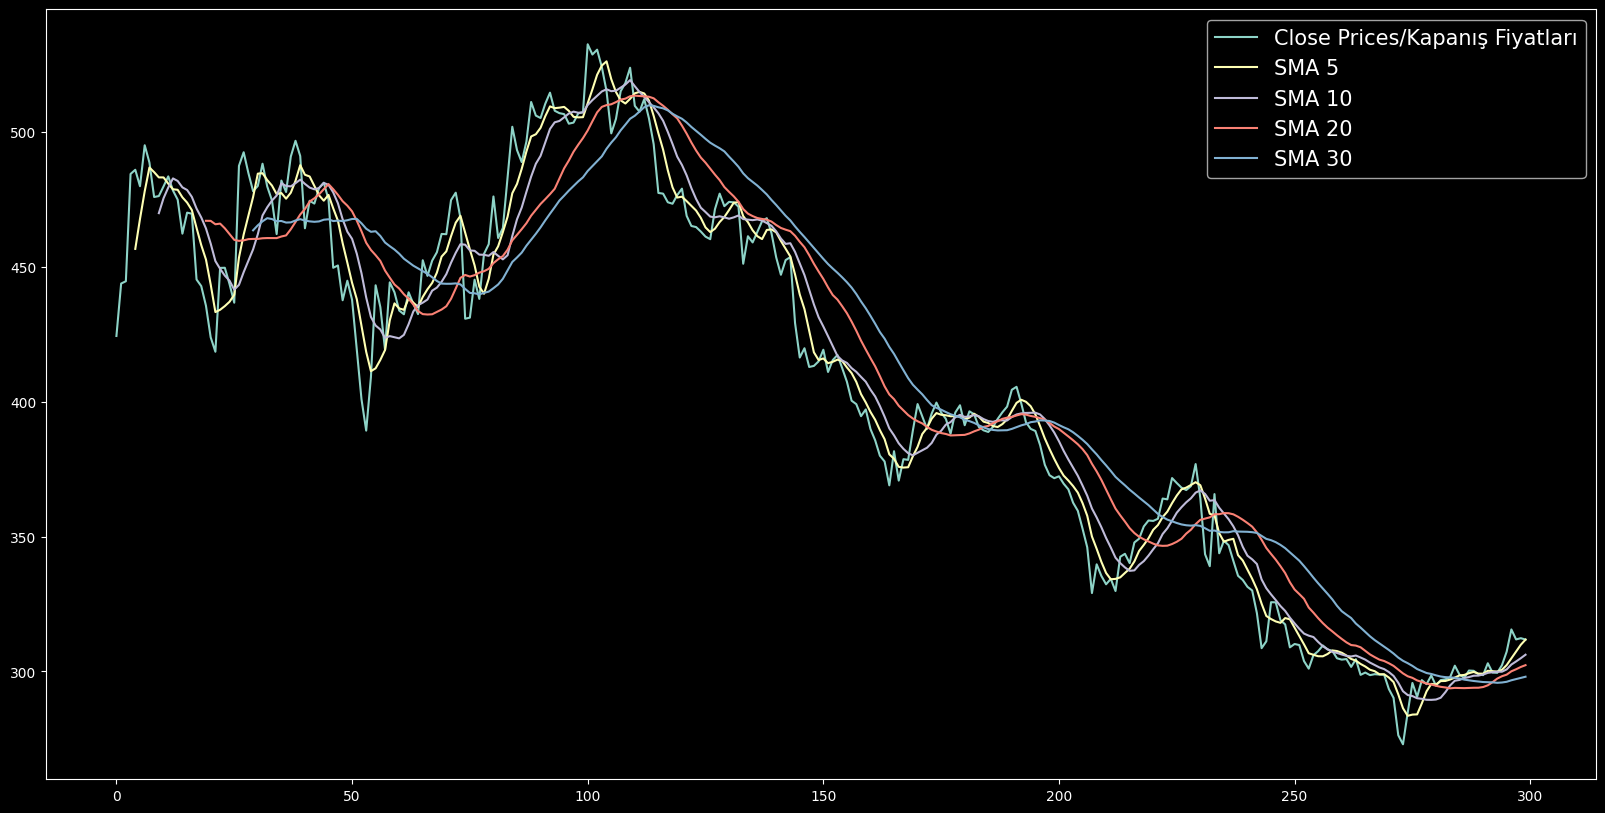

In [67]:
plt.figure(figsize=(20, 10))
plt.plot(close_prices, label='Close Prices/Kapanış Fiyatları')
plt.plot(sma_5, label='SMA 5')
plt.plot(sma_10, label='SMA 10')
plt.plot(sma_20, label='SMA 20')
plt.plot(sma_30, label='SMA 30')
plt.legend(prop={'size': 15})
plt.show()


In [68]:
trade_params = pd.DataFrame(
    list(
        zip(
            close_prices, sma_5, sma_10, sma_20, sma_30, momentum_values, relative_strength_indexs,
            upper_bollinger_band, lower_bollinger_band
        )
    ),
    columns=[
        'Close Prices', 'SMA 5', 'SMA 10', 'SMA 20', 'SMA 30', 'Momentum', 'RSI',
        'Upper Bollinger Band', 'Lower Bollinger Band'
    ]
)

In [69]:
trade_params

,Close Prices,SMA 5,SMA 10,SMA 20,SMA 30,Momentum,RSI,Upper Bollinger Band,Lower Bollinger Band
0,424.399994,NaN,NaN,NaN,NaN,55.500000,NaN,NaN,NaN
1,443.850006,NaN,NaN,NaN,NaN,39.750000,NaN,NaN,NaN
2,444.700012,NaN,NaN,NaN,NaN,33.649994,NaN,NaN,NaN
3,484.500000,NaN,NaN,NaN,NaN,-9.549988,NaN,NaN,NaN
4,486.049988,456.700000,NaN,NaN,NaN,-23.699982,NaN,511.350473,402.049527
...,...,...,...,...,...,...,...,...,...
285,298.750000,298.500000,296.820001,293.827502,297.333335,8.549988,49.617907,302.813939,294.186061
286,297.600006,298.670001,297.525003,293.777502,296.933335,17.949982,48.485636,302.696545,294.643457
287,300.299988,299.320001,297.880002,293.845001,296.673335,11.550018,51.295779,303.079386,295.560617
288,300.200012,299.790002,298.375003,293.915002,296.426668,12.099976,51.184438,303.202040,296.377965


In [70]:
print(trade_params['RSI'].iloc[13])

nan


In [71]:
buy_signal = []
sell_signal = []
trigger = 0

for i in range(len(trade_params)):
    if (trade_params['SMA 5'].iloc[i] < trade_params['SMA 20'].iloc[i]) and trigger != 1:
        # If SMA 5 crosses below SMA 20 and no previous sell signal, generate a sell signal
        # Eğer SMA 5 SMA 20'nin altına geçer ve daha önce satış sinyali yoksa, bir satış sinyali üret
        sell_signal.append(float("nan"))
        buy_signal.append(close_prices[i])
        trigger = 1

    elif (trade_params['SMA 5'].iloc[i] > trade_params['SMA 20'].iloc[i]) and trigger != -1:
        # If SMA 5 crosses above SMA 20 and no previous buy signal, generate a buy signal
        # Eğer SMA 5 SMA 20'nin üstüne geçer ve daha önce alım sinyali yoksa, bir alım sinyali üret
        sell_signal.append(close_prices[i])
        buy_signal.append(float("nan"))
        trigger = -1
    else:
        # No signal generated
        # Sinyal üretilmedi
        buy_signal.append(float("nan"))
        sell_signal.append(float("nan"))

In [72]:
trade_params['Buy Signal'] = buy_signal
trade_params['Sell Signal'] = sell_signal

In [73]:
trade_params[0:10]

,Close Prices,SMA 5,SMA 10,SMA 20,SMA 30,Momentum,RSI,Upper Bollinger Band,Lower Bollinger Band,Buy Signal,Sell Signal
0,424.399994,NaN,NaN,NaN,NaN,55.500000,NaN,NaN,NaN,NaN,NaN
1,443.850006,NaN,NaN,NaN,NaN,39.750000,NaN,NaN,NaN,NaN,NaN
2,444.700012,NaN,NaN,NaN,NaN,33.649994,NaN,NaN,NaN,NaN,NaN
3,484.500000,NaN,NaN,NaN,NaN,-9.549988,NaN,NaN,NaN,NaN,NaN
4,486.049988,456.700000,NaN,NaN,NaN,-23.699982,NaN,511.350473,402.049527,NaN,NaN
5,479.950012,467.810004,NaN,NaN,NaN,-9.800018,NaN,511.016323,424.603685,NaN,NaN
6,495.149994,478.070001,NaN,NaN,NaN,-25.399994,NaN,516.978122,439.161881,NaN,NaN
7,488.750000,486.879999,NaN,NaN,NaN,-43.399994,NaN,498.116891,475.643106,NaN,NaN
8,475.950012,485.170001,NaN,NaN,NaN,-33.050018,NaN,500.184911,470.155092,NaN,NaN
9,476.299988,483.220001,469.960001,NaN,NaN,-40.699982,NaN,500.082319,466.357683,NaN,NaN


In [74]:
print(len(trade_params['SMA 20']))
print(len(close_prices))

290
300


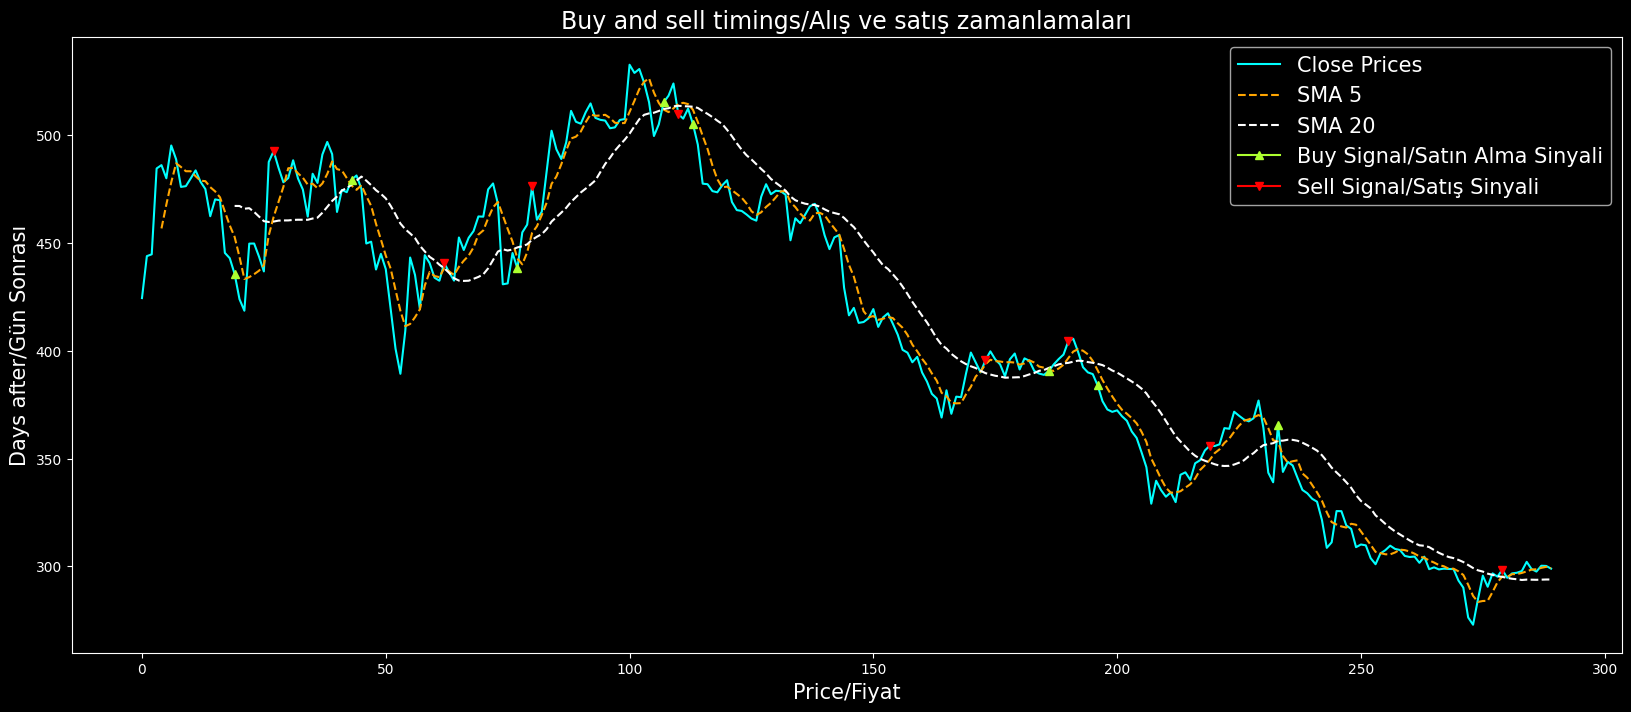

In [75]:
plt.figure(figsize=(20, 8))
plt.plot(trade_params['Close Prices'], label='Close Prices', color='cyan')
plt.plot(trade_params['SMA 5'], linestyle='--', label='SMA 5', color='orange')
plt.plot(trade_params['SMA 20'], linestyle='--',label='SMA 20', color='white')
plt.plot(trade_params['Buy Signal'], marker='^', color='greenyellow', label='Buy Signal/Satın Alma Sinyali')
plt.plot(trade_params['Sell Signal'], marker='v', color='r', label='Sell Signal/Satış Sinyali')
plt.legend(prop={'size': 15})
plt.title("Buy and sell timings/Alış ve satış zamanlamaları", fontsize=17)
plt.ylabel("Days after/Gün Sonrası", fontsize=15)
plt.xlabel("Price/Fiyat", fontsize=15)
plt.savefig("graphed-results/Algorithmic Traded Results")
plt.show()


## Generate an analytics report based on the collected data

## Toplanan verilere dayalı bir analiz raporu oluşturun

In [76]:
from fpdf import FPDF
FONT_FAMILY = "Arial"
WIDTH = 210
HEIGHT = 297

In [77]:
pdf = FPDF()
pdf.add_page()
pdf.set_font(FONT_FAMILY, size=40)
pdf.ln(40)
pdf.multi_cell(w=0, h=15, txt=f"An analysis of the stock: {ticker}")

pdf.add_page()
pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="Introduction")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=13)
pdf.multi_cell(w=0, h=7, txt=f"This report will analyse the stock: {ticker} using several tehnical indicators and other tecniques which will give an idea about the future trends of the given stock.")
pdf.ln(15)

pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="Indicators Used")
pdf.ln(15)

indicators = ["RSI", "Bollinger Bands", "OBV", "Momentum"]
pdf.set_font(FONT_FAMILY, size=13)
for i in range(len(indicators)):
    pdf.cell(0, txt=f"{i+1}. {indicators[i]}")
    pdf.ln(6)


pdf.add_page()
pdf.ln(5)
pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="RSI")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=13)
pdf.multi_cell(w=0, h=7, txt=f"The RSI or the Relative Strength Index gives us an indiaction if the stock/asset is overbought or oversold. An RSI >= 70 indicates that a stock has been overbought and a potential drop in price could be near, while a RSI <= 30 indicates that a stock has been oversold and can potentially have a bullish trend in the near future.")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=25)
pdf.multi_cell(w=0, h=8, txt=f"RSI chart over the year for: {ticker} is given below.")
pdf.ln(8)
pdf.image("graphed-results/RSI.png", 12, 100, WIDTH - 20, 100)
pdf.ln(115)
pdf.set_font(FONT_FAMILY, size=13)

curr_rsi = relative_strength_indexs[len(relative_strength_indexs) - 1]
rsi_mean = pd.Series(relative_strength_indexs).mean()

rsi_state_rel = f"high" if curr_rsi > rsi_mean + 2.5 else f"low"
rsi_state_abs = f"low" if curr_rsi < 45 else (f"medium" if curr_rsi < 60 else f"high")
sell_state = f"selling" if rsi_state_abs == "low" else f"buying"
price_action_dir = f"upward" if sell_state == "selling" else f"downward"

pdf.multi_cell(w=0, h=7, txt=f"As it is seen the current RSI is: {round(curr_rsi, 2)} which is considered {rsi_state_rel} relative to a 1 year trend of the stock. In a normal scenario such an rsi is considered {rsi_state_abs}. Thus this indicates that there has been more of {sell_state} and that there can be an {price_action_dir} trend in the near future. Keep in mind that this is a meare technical indication which does not take into account any sentiments of people regarding the company or the general performance or profitablity of the company, thus there is a risk to using this strategy. This does not hold true for this but all the other indicators also used henceforth.")

pdf.add_page()  
pdf.ln(5)
pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="Bollinger Bands")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=13)
pdf.multi_cell(w=0, h=7, txt=f"Using bollinger bands one can get an idea about the volitility about the stock market and if there are any major trends in motion. Bollinger bands when supplemented with the RSI give us a very clear picture regarding the state of a stock.")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=25)
pdf.multi_cell(
    w=0, h=10, txt=f"A visualization of the Bollinger Bands for: {ticker} over the year.")
pdf.ln(8)
pdf.image("graphed-results/SMA + Bollinger Bands.png",
          12, 90, WIDTH - 20, 100)
pdf.ln(100)
pdf.set_font(FONT_FAMILY, size=13)

close_price_sma_status = "above" if close_prices[len(close_prices) - 1] > close_avg[len(close_avg) - 1] else "below"
close_sma_stat_msg = "this means that the stock is showing a bullish trend over the SMA period which in this case is 5 days." if close_price_sma_status == "above" else "this means that either recently or over the SMA period the stock has shown a bearish trend"


pdf.multi_cell(w=0, h=7, txt=f"In this case we can see that the current close price is {close_price_sma_status} the simple moving average computed over a 5 day period {close_sma_stat_msg}")
pdf.ln(8)

closer_band = "upper band" if abs(upper_bollinger_band[len(upper_bollinger_band) - 1] - close_prices[len(close_prices) - 1]) < abs(
    lower_bollinger_band[len(lower_bollinger_band) - 1] - close_prices[len(close_prices) - 1]) else "lower band"

print(abs(upper_bollinger_band[len(upper_bollinger_band) - 1] - close_prices[len(close_prices) - 1]))
print(abs(lower_bollinger_band[len(
    lower_bollinger_band) - 1] - close_prices[len(close_prices) - 1]))

pdf.multi_cell(w=0, h=7, txt=f"So now we can move on and look at the upper and lower bollinger bands. We can see that the stock of our choice is closer to the {closer_band}. By looking at this we can identify the trend of the stock and also its strength. Thus this supplements our RSI indicator very smoothly.")


pdf.add_page()
pdf.ln(5)
pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="OBV")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=13)
pdf.multi_cell(w=0, h=7, txt=f"OBV or On Balance Volume can be used to get an idea of the total running volume of an asset and track if it is moving up or down. Any major movements in the OBV of a stock can be used to track any movements made by large institutional investors.")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=25)
pdf.multi_cell(
    w=0, h=10, txt=f"A visualization of the OBV for: {ticker} over the year.")
pdf.ln(3)
pdf.image("graphed-results/SMA(OBV) + OBV.png",
          12, 90, WIDTH - 20, 100)
pdf.ln(120)
pdf.set_font(FONT_FAMILY, size=13)
pdf.multi_cell(w=0, h=7, txt=f'In this case if we look at the recent OBV trend we can get a good idea about the general outlook that the stock has among not just large instututions but even the average investor. Besides this the OBV indicator does not require any further details.')


pdf.add_page()
pdf.ln(5)
pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="Momentum")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=13)
pdf.multi_cell(w=0, h=7, txt=f"The Momentum indicator as its name gives us an idea of a stock's momentum i.e the strength of the trend that a stock has. By taking a look at the momentum we can determine how long a buying, selling, bullish or bearish trend will continue.")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=25)
pdf.multi_cell(
    w=0, h=10, txt=f"A visualization of the Momentum for: {ticker} over the year.")
pdf.ln(3)
pdf.image("graphed-results/momentum.png",
          12, 90, WIDTH - 20, 100)
pdf.ln(110)
pdf.set_font(FONT_FAMILY, size=13)

momentum_over_0 = "over zero" if momentum_values[len(momentum_values) - 1] > 0 else "below zero"
curr_momentum = momentum_values[len(momentum_values) - 1]
pdf.multi_cell(
    w=0, h=7, txt=f"By looking at the recent momentum values one can easily deduce the momentum of the stock. The stock currently is having a momentum of {round(curr_momentum, 2)} and an average momentum of {round(avg_momentum, 2)} over the year.")


pdf.add_page()
pdf.ln(5)
pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="Final Future Trend")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=25)
pdf.multi_cell(
    w=0, h=10, txt=f"Our Neural Network's prediction regarding {ticker} future 5 day trend")
# pdf.ln(3)
pdf.image(f"graphed-results/future trend over {NUM_OF_FUTURE_DAYS} days.png",
          12, 70, WIDTH - 20, 100)

5.838524164442106
5.918516840223333


In [78]:
pdf.output(f"Analysis report of {ticker}.pdf")

''

In [79]:
## Türkçesi

In [80]:
# pdf = FPDF()
# pdf.add_page()
# pdf.set_font(FONT_FAMILY, size=40)
# pdf.ln(40)
# pdf.multi_cell(w=0, h=15, txt=f"{ticker} stokunun analizi")

# pdf.add_page()
# pdf.set_font(FONT_FAMILY, size=40)
# pdf.cell(0, txt="Giriş")
# pdf.ln(15)
# pdf.set_font(FONT_FAMILY, size=13)
# pdf.multi_cell(w=0, h=7, txt=f"Bu rapor, {ticker} stokunu çeşitli teknik göstergeler ve diğer yöntemler kullanarak analiz edecek ve verilen stokun gelecekteki eğilimleri hakkında bir fikir verecektir.")
# pdf.ln(15)

# pdf.set_font(FONT_FAMILY, size=40)
# pdf.cell(0, txt="Kullanılan Göstergeler")
# pdf.ln(15)

# indicators = ["RSI", "Bollinger Bantları", "OBV", "Momentum"]
# pdf.set_font(FONT_FAMILY, size=13)
# for i in range(len(indicators)):
#     pdf.cell(0, txt=f"{i+1}. {indicators[i]}")
#     pdf.ln(6)


# pdf.add_page()
# pdf.ln(5)
# pdf.set_font(FONT_FAMILY, size=40)
# pdf.cell(0, txt="RSI")
# pdf.ln(15)
# pdf.set_font(FONT_FAMILY, size=13)
# pdf.multi_cell(w=0, h=7, txt=f"RSI veya Göreceli Güç Endeksi, bir stokun aşırı alınıp satıldığını gösteren bir göstergedir. RSI >= 70, bir stokun aşırı alındığını ve fiyatının yakın zamanda düşebileceğini gösterirken, RSI <= 30, bir stokun aşırı satıldığını ve yakın gelecekte yükseliş eğilimi gösterebileceğini gösterir.")
# pdf.ln(15)
# pdf.set_font(FONT_FAMILY, size=25)
# pdf.multi_cell(w=0, h=8, txt=f"{ticker} için bir yıl boyunca RSI grafiği aşağıda verilmiştir.")
# pdf.ln(8)
# pdf.image("graphed-results/RSI.png", 12, 100, WIDTH - 20, 100)
# pdf.ln(115)
# pdf.set_font(FONT_FAMILY, size=13)

# curr_rsi = relative_strength_indexs[len(relative_strength_indexs) - 1]
# rsi_mean = pd.Series(relative_strength_indexs).mean()

# rsi_state_rel = "yüksek" if curr_rsi > rsi_mean + 2.5 else "düşük"
# rsi_state_abs = "düşük" if curr_rsi < 45 else ("orta" if curr_rsi < 60 else "yüksek")
# sell_state = "satış" if rsi_state_abs == "düşük" else "alış"
# price_action_dir = "yukarı yönlü" if sell_state == "satış" else "aşağı yönlü"

# pdf.set_font(FONT_FAMILY, size=13)
# txt = f"Görüldüğü gibi, mevcut RSI değeri: {round(curr_rsi, 2)} ve bu, stokun 1 yıllık trendine göre {rsi_state_rel} olarak kabul edilmektedir. Normal bir senaryoda böyle bir RSI değeri {rsi_state_abs} olarak kabul edilir. Bu da daha fazla {sell_state} olduğunu ve yakın gelecekte {price_action_dir} bir eğilim olabileceğini gösterir. Bununla birlikte, bu yalnızca teknik bir göstergedir ve şirketle ilgili insanların duygularını veya genel performansını veya karlılığını dikkate almaz, bu nedenle bu stratejiyi kullanmanın riski vardır. Bu, yalnızca bu değil, diğer kullanılan göstergeler için de geçerlidir."

# pdf.add_page()  
# pdf.ln(5)
# pdf.set_font(FONT_FAMILY, size=40)
# pdf.cell(0, txt="Bollinger Bantları")
# pdf.ln(15)
# pdf.set_font(FONT_FAMILY, size=13)
# pdf.multi_cell(w=0, h=7, txt=f"Bollinger bantları kullanılarak piyasanın volatilitesi hakkında bir fikir edinilebilir ve herhangi büyük trendlerin hareket halinde olup olmadığı takip edilebilir. Bollinger bantları, RSI ile birlikte kullanıldığında bir hissenin durumu hakkında çok net bir resim çizer.")
# pdf.ln(15)
# pdf.set_font(FONT_FAMILY, size=25)
# pdf.multi_cell(w=0, h=10, txt=f"{ticker} için Bollinger Bantlarının bir yıl boyunca görselleştirilmesi.")
# pdf.ln(8)
# pdf.image("graphed-results/SMA + Bollinger Bands.png",
#           12, 90, WIDTH - 20, 100)
# pdf.ln(100)
# pdf.set_font(FONT_FAMILY, size=13)

# close_price_sma_status = "üzerinde" if close_prices[len(close_prices) - 1] > close_avg[len(close_avg) - 1] else "altında"
# close_sma_stat_msg = "bu, hissenin 5 günlük SMA dönemi üzerinde boğa eğilimi gösterdiği anlamına gelir." if close_price_sma_status == "üzerinde" else "bu, hissenin ya son zamanlarda ya da SMA dönemi boyunca düşüş eğilimi gösterdiği anlamına gelir"


# pdf.multi_cell(w=0, h=7, txt=f"Bu durumda, mevcut kapanış fiyatının, 5 günlük SMA dönemi üzerinde olduğunu görebiliyoruz, {close_sma_stat_msg}")
# pdf.ln(8)


# closer_band = "üst bant" if abs(upper_bollinger_band[len(upper_bollinger_band) - 1] - close_prices[len(close_prices) - 1]) < abs(
#     lower_bollinger_band[len(lower_bollinger_band) - 1] - close_prices[len(close_prices) - 1]) else "alt bant"

# pdf.multi_cell(w=0, h=7, txt=f"Şimdi üst ve alt Bollinger bantlarına bakabiliriz. Seçtiğimiz hisse senedi {closer_band}'a daha yakın. Bu duruma bakarak hissenin eğilimini ve gücünü belirleyebiliriz. Bu şekilde RSI göstergesini tamamlamış oluruz.")


# pdf.add_page()
# pdf.ln(5)
# pdf.set_font(FONT_FAMILY, size=40)
# pdf.cell(0, txt="OBV")
# pdf.ln(15)
# pdf.set_font(FONT_FAMILY, size=13)
# pdf.multi_cell(w=0, h=7, txt=f"OBV veya On Balance Volume, bir varlığın toplam işlem hacmi hakkında fikir edinmek ve yukarı veya aşağı yönde hareket edip etmediğini takip etmek için kullanılabilir. Bir hissenin OBV'sindeki önemli hareketler, büyük kurumsal yatırımcılar tarafından yapılan herhangi bir hareketi takip etmek için kullanılabilir.")
# pdf.ln(15)
# pdf.set_font(FONT_FAMILY, size=25)
# pdf.multi_cell(
#     w=0, h=10, txt=f"{ticker} için bir yıl boyunca OBV'nin görselleştirilmesi.")
# pdf.ln(3)
# pdf.image("graphed-results/SMA(OBV) + OBV.png",
#           12, 90, WIDTH - 20, 100)
# pdf.ln(120)
# pdf.set_font(FONT_FAMILY, size=13)
# pdf.multi_cell(w=0, h=7, txt=f'Bu durumda, son OBV eğilimine baktığımızda, hissenin sadece büyük kurumlarla değil, aynı zamanda orta düzey yatırımcılarla ilgili genel görünümü hakkında iyi bir fikir edinebiliriz. Ayrıca, OBV göstergesi başka herhangi bir ayrıntı gerektirmez.')


# pdf.add_page()
# pdf.ln(5)
# pdf.set_font(FONT_FAMILY, size=40)
# pdf.cell(0, txt="Momentum")
# pdf.ln(15)
# pdf.set_font(FONT_FAMILY, size=13)
# pdf.multi_cell(w=0, h=7, txt=f"Momentum göstergesi, adından da anlaşılacağı gibi bir hissenin momentumunu, yani hissenin eğiliminin gücünü temsil eder. Momentum değerlerine bakarak, alış, satış, boğa veya ayı eğiliminin ne kadar süreceğini belirleyebiliriz.")
# pdf.ln(15)
# pdf.set_font(FONT_FAMILY, size=25)

# pdf.add_page()
# pdf.ln(5)
# pdf.set_font(FONT_FAMILY, size=40)
# pdf.cell(0, txt="Nihai Gelecek Eğilimi")
# pdf.ln(15)
# pdf.set_font(FONT_FAMILY, size=25)
# pdf.multi_cell(
#     w=0, h=10, txt=f"Yapay Sinir Ağımızın {ticker} için gelecek 5 günlük eğilim tahmini")
# pdf.image(f"graphed-results/future trend over {NUM_OF_FUTURE_DAYS} days.png",
#           12, 70, WIDTH - 20, 100)


In [81]:
# pdf.output(f"Analysis report of {ticker}.pdf")